### TAREAS CONJUNTO DE DATOS ###
### 'goldstock.csv' ###

### Origen: https://www.kaggle.com/datasets/sahilwagh/gold-stock-prices ###

### Nombre del DataFrame: 'goldstock'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

# Cargar el archivo CSV
file_path = 'goldstock.csv'
goldstock = pd.read_csv(file_path)

# Descripción general
print("Información general del dataset:")
print(goldstock.info())
print("\nDescripción estadística del dataset:")
print(goldstock.describe())

# Mostrar las primeras y últimas filas
print("\nPrimeras filas del dataset:")
print(goldstock.head())

print("\nÚltimas filas del dataset:")
print(goldstock.tail())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(goldstock.isnull().sum())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB
None

Descripción estadística del dataset:
        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.600000       1.000000  1051.500000  1062.700000   
25%  

In [2]:
# Convertir la columna 'Date' a un formato de fecha
goldstock['Date'] = pd.to_datetime(goldstock['Date'])

# Eliminar la columna 'Unnamed: 0'
goldstock = goldstock.drop(columns=['Unnamed: 0'])

# Verificar el resultado
print(goldstock.head())
print(goldstock.info())

        Date   Close    Volume    Open    High     Low
0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB
None


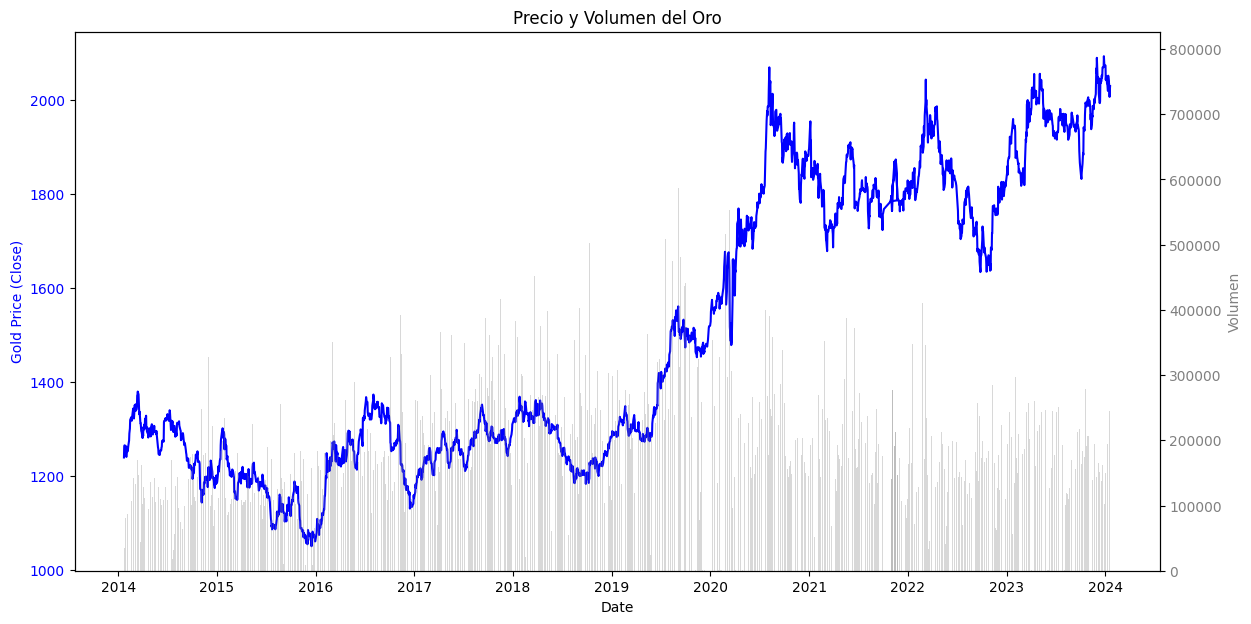

In [3]:
# Crear el gráfico con dos ejes y volumen debajo del eje de fechas
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico del precio del oro
ax1.plot(goldstock['Date'], goldstock['Close'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (Close)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para el volumen
ax2 = ax1.twinx()
ax2.bar(goldstock['Date'], goldstock['Volume'], alpha=0.3, color='grey')
ax2.set_ylabel('Volumen', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('Precio y Volumen del Oro')
plt.show()

In [4]:
# Añadir columna de año
goldstock['Year'] = goldstock['Date'].dt.year
goldstock['Month'] = goldstock['Date'].dt.month
# Filtrar los datos para quitar el año 2024
goldstock = goldstock[goldstock['Year'] <= 2023]


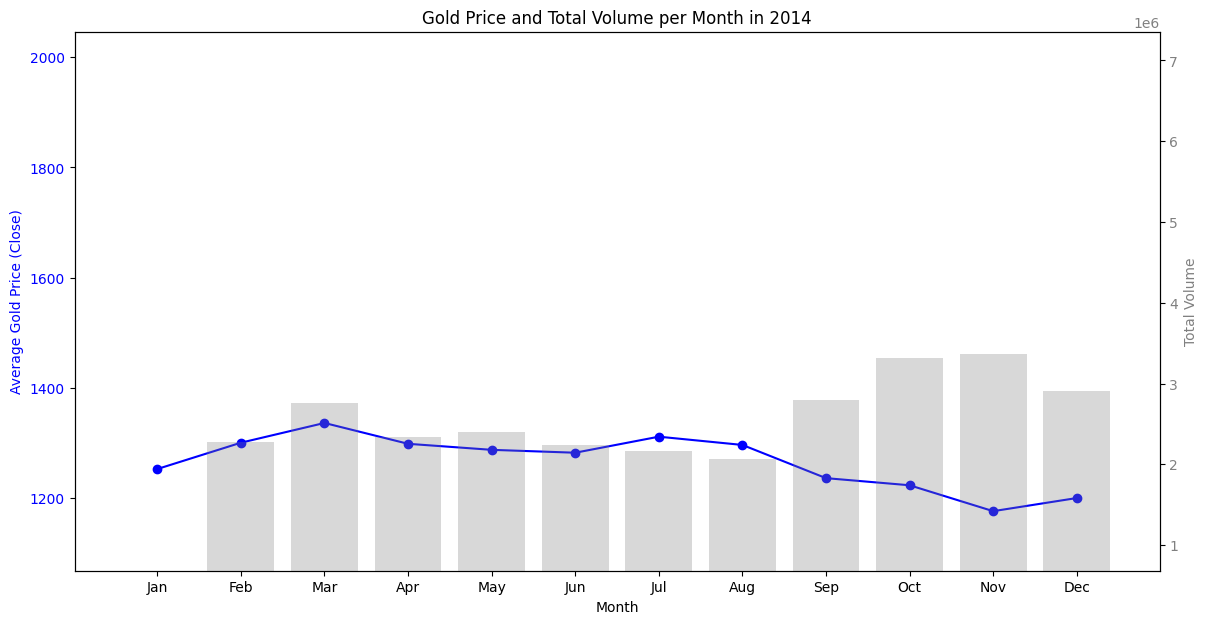

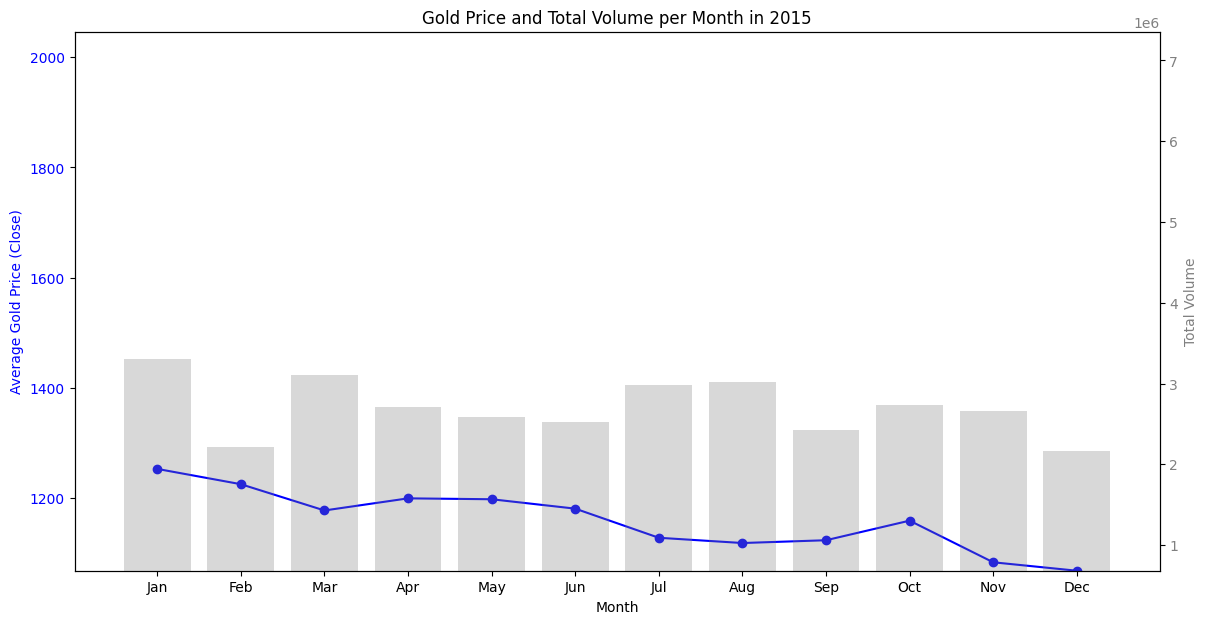

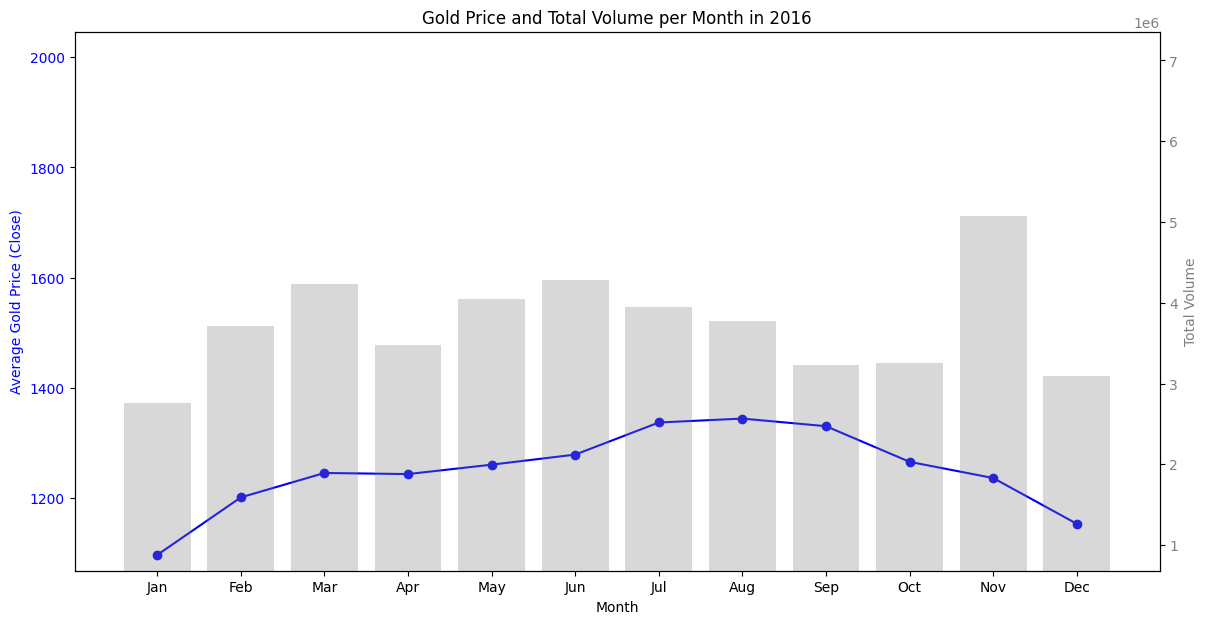

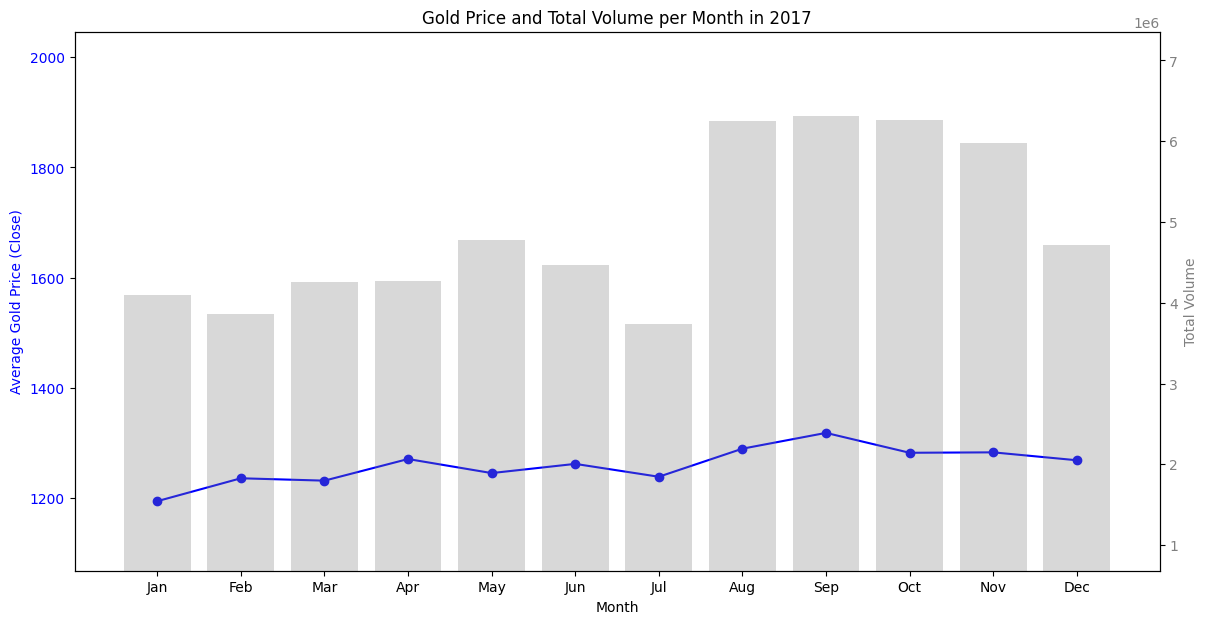

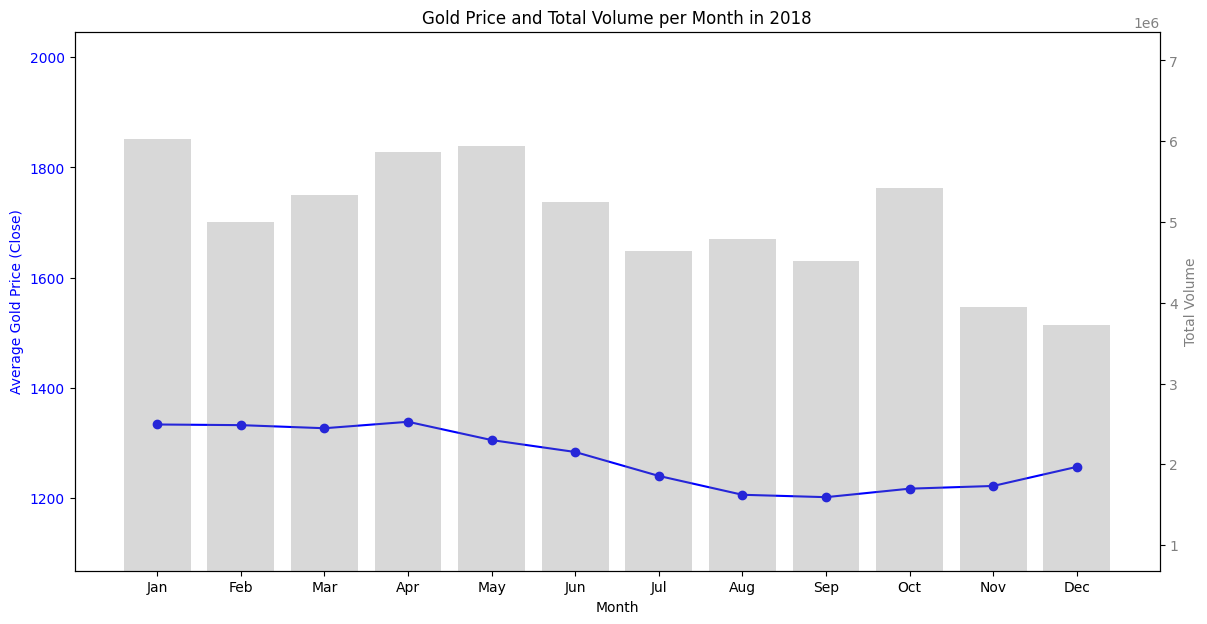

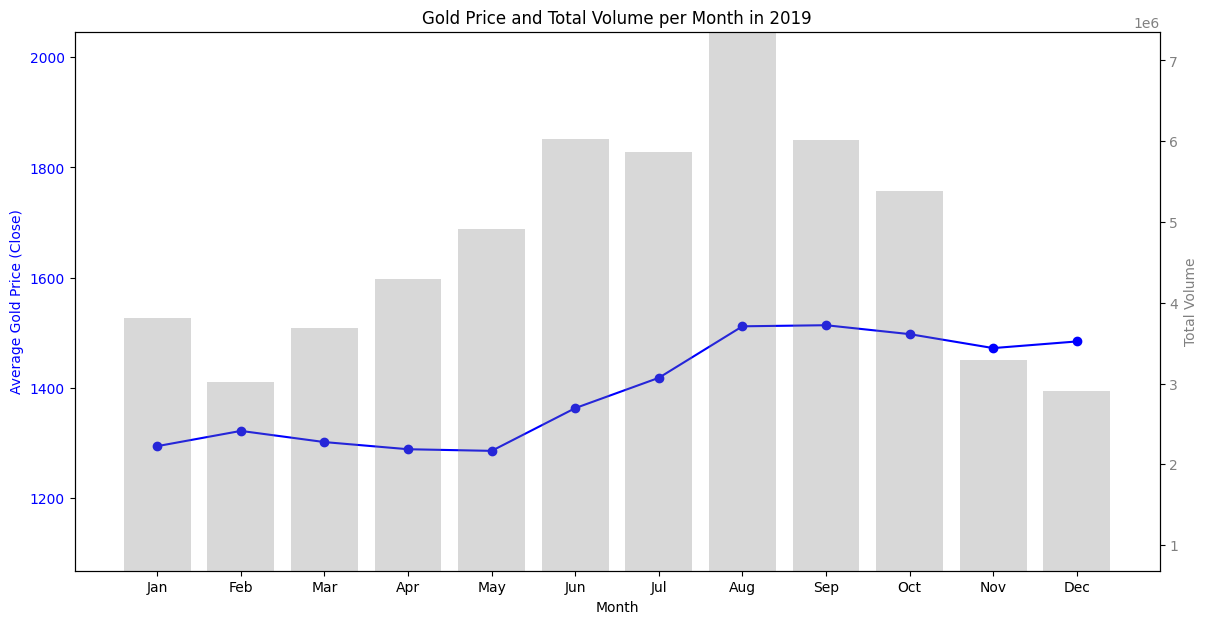

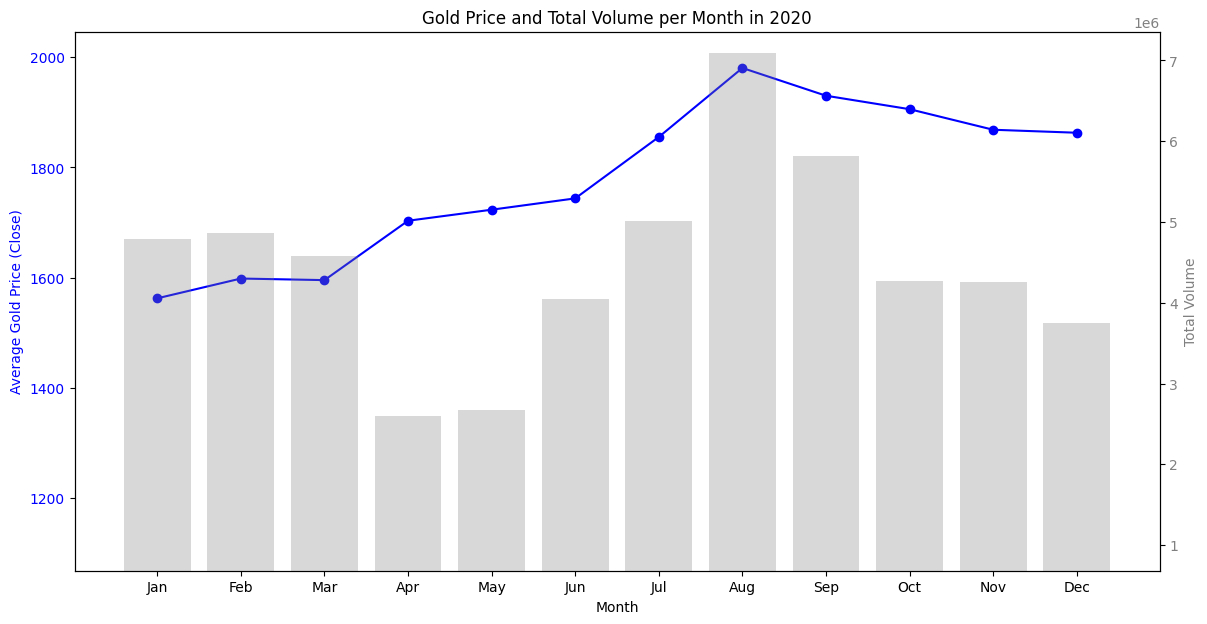

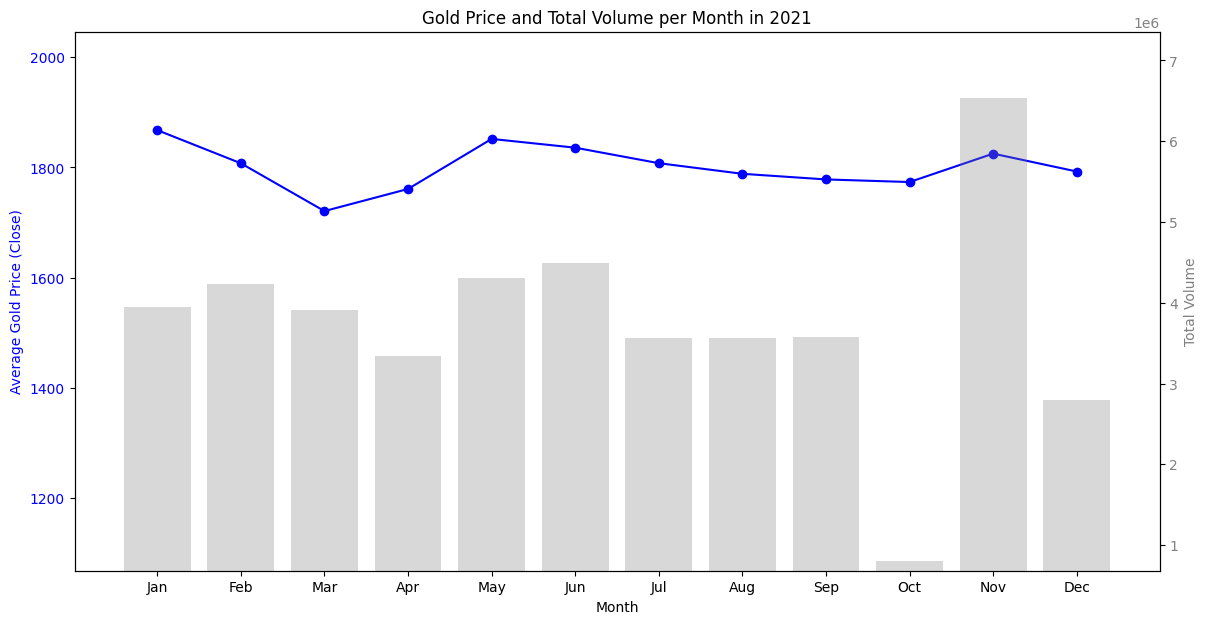

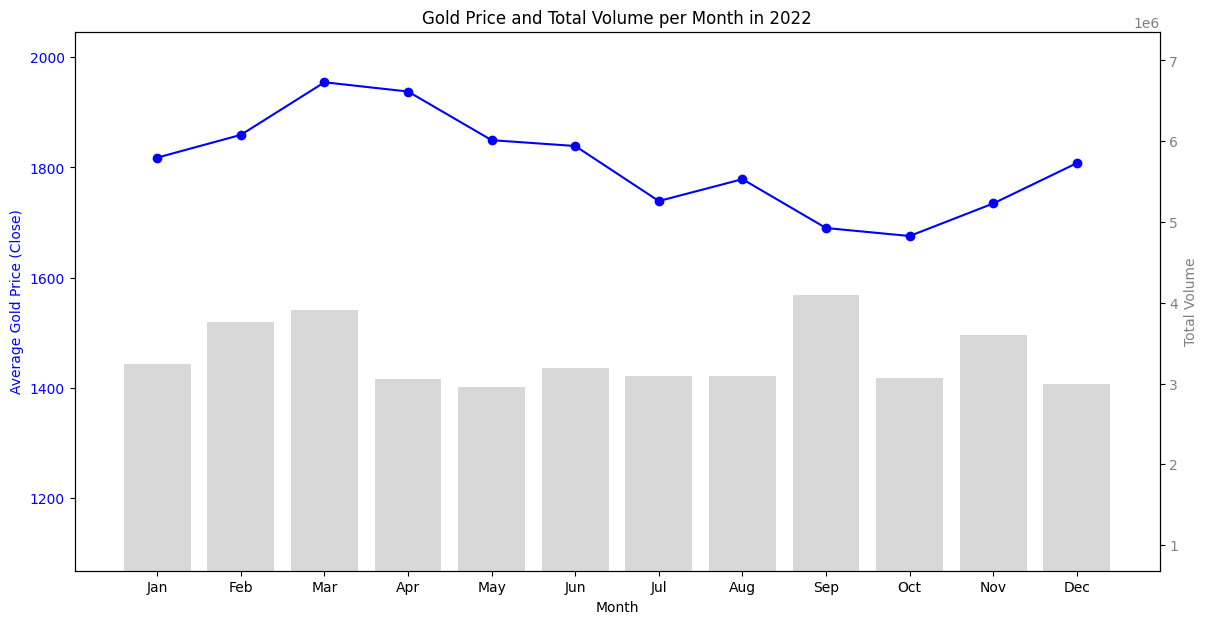

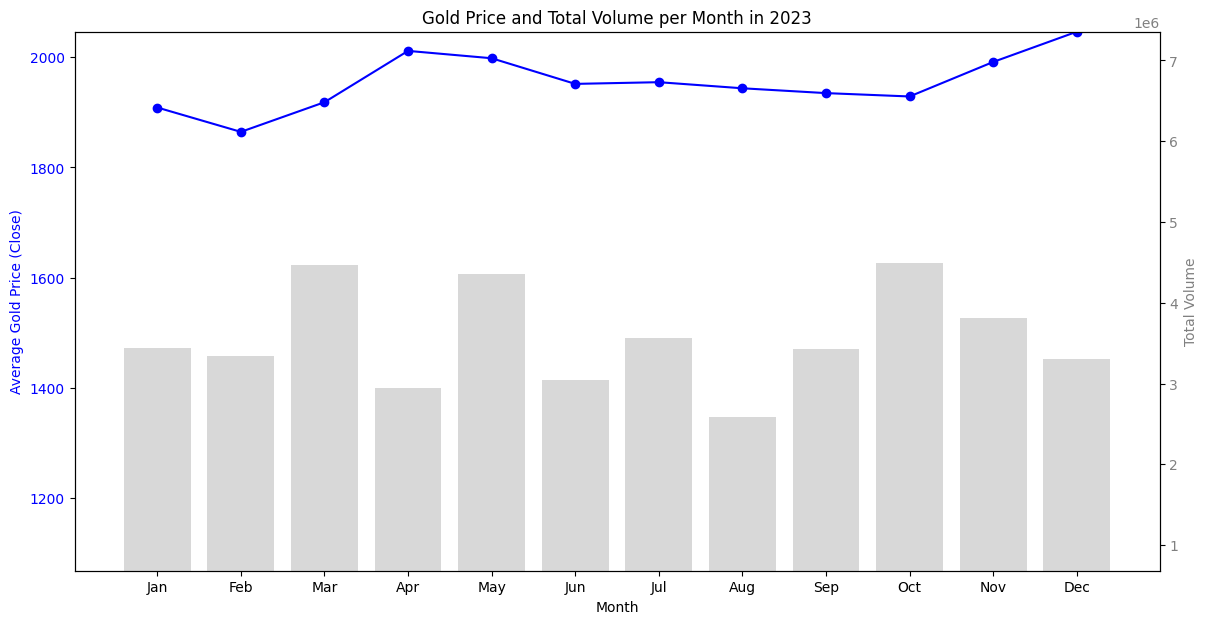

In [5]:
# Agrupar por año y mes y calcular el volumen total y el precio promedio de cierre
monthly_data = goldstock.groupby(['Year', 'Month']).agg({'Volume': 'sum', 'Close': 'mean'}).reset_index()

# Encontrar los límites de los ejes para mantener la escala uniforme
max_volume = monthly_data['Volume'].max()
min_volume = monthly_data['Volume'].min()
max_close = monthly_data['Close'].max()
min_close = monthly_data['Close'].min()

# Crear gráficos individuales para cada año
years = monthly_data['Year'].unique()
for year in years:
    if year == 2024:
        continue
    
    data_year = monthly_data[monthly_data['Year'] == year]
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Gráfico del precio del oro
    ax1.plot(data_year['Month'], data_year['Close'], color='blue', marker='o')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Gold Price (Close)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax1.set_ylim(min_close, max_close)
    
    # Crear un segundo eje para el volumen
    ax2 = ax1.twinx()
    ax2.bar(data_year['Month'], data_year['Volume'], alpha=0.3, color='grey')
    ax2.set_ylabel('Total Volume', color='grey')
    ax2.tick_params(axis='y', labelcolor='grey')
    ax2.set_ylim(min_volume, max_volume)
    
    plt.title(f'Gold Price and Total Volume per Month in {year}')
    plt.show()

### TAREAS CONJUNTO DE DATOS ###
### 'GC=F' ###

### Origen:Yahoo! Finance ###
### Nombre del DataFrame: df_gold

In [6]:
# Vamos a obtener el conjunto de datos similar para comparar con el anterior
# Incluimos el import para las operaciones con Yahoo Finance
import yfinance as yf
import datetime as dt

# Lectura de datos desde yfinance
current_date = dt.datetime.now() # Por si necesitaramos utizar la fecha actual.
df_gold = yf.download('GC=F', start='2014-01-22', end='2024-01-19', auto_adjust=True)

# Descripción general
print("Información general del dataset:")
print(df_gold.info())
print("\nDescripción estadística del dataset:")
print(df_gold.describe())

# Mostrar las primeras y últimas filas
print("\nPrimeras filas del dataset:")
print(df_gold.head())

print("\nÚltimas filas del dataset:")
print(df_gold.tail())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df_gold.isnull().sum())

[*********************100%%**********************]  1 of 1 completed

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2014-01-22 to 2024-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2513 non-null   float64
 1   High    2513 non-null   float64
 2   Low     2513 non-null   float64
 3   Close   2513 non-null   float64
 4   Volume  2513 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.8 KB
None

Descripción estadística del dataset:
              Open         High          Low        Close         Volume
count  2513.000000  2513.000000  2513.000000  2513.000000    2513.000000
mean   1494.751015  1501.760924  1487.833825  1494.778789    5311.463589
std     295.904912   297.662285   294.268456   295.918402   29358.987472
min    1053.699951  1062.000000  1046.199951  1050.800049       0.000000
25%    1248.000000  1253.199951  1241.699951  1247.599976      46.000000
50%    1331.099976  1337.500000  1326.199951  1331.

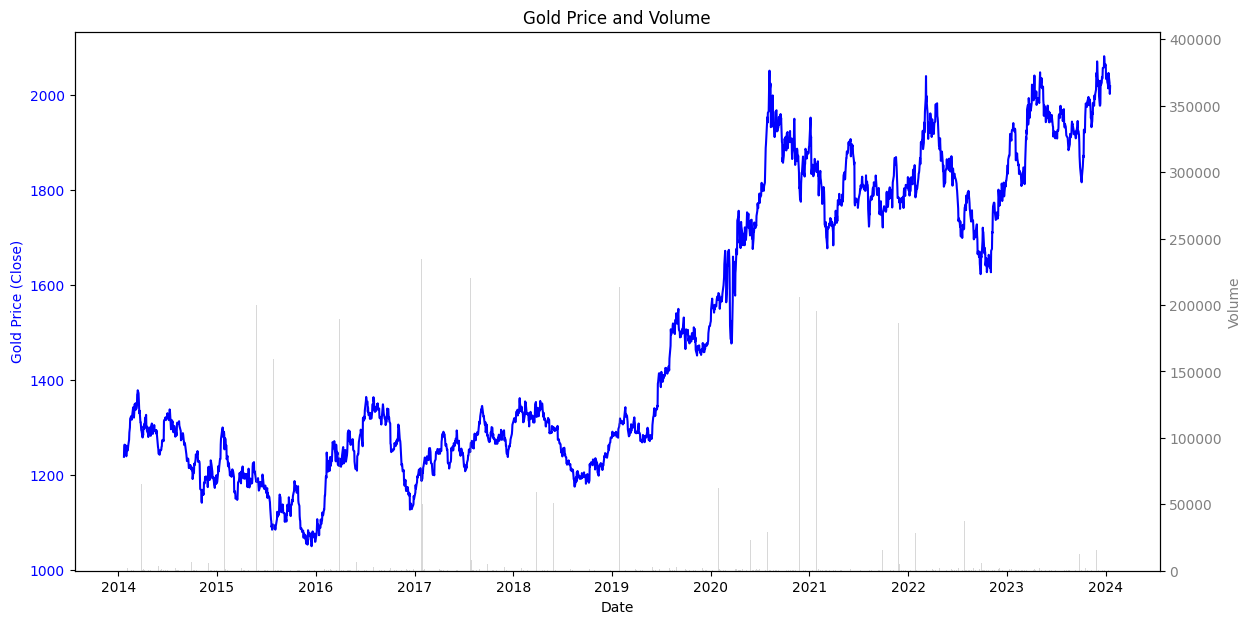

In [7]:
# Crear el gráfico con dos ejes y volumen debajo del eje de fechas
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico del precio del oro
ax1.plot(df_gold.index, df_gold['Close'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (Close)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para el volumen
ax2 = ax1.twinx()
ax2.bar(df_gold.index, df_gold['Volume'], alpha=0.3, color='grey')
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('Gold Price and Volume')
plt.show()

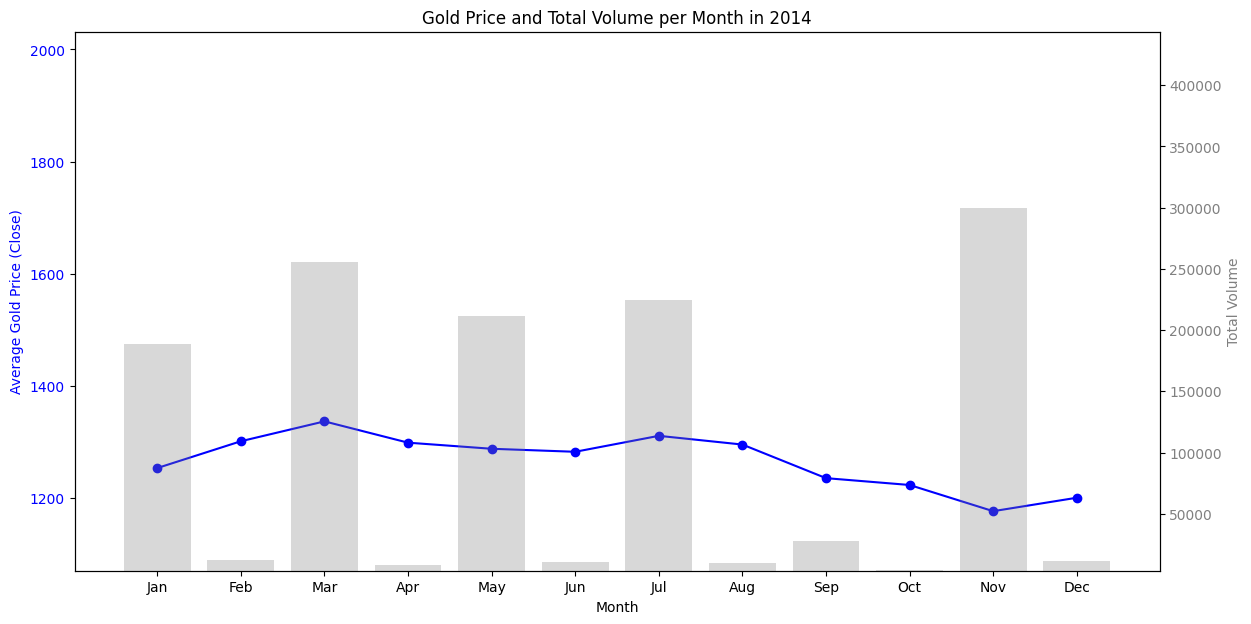

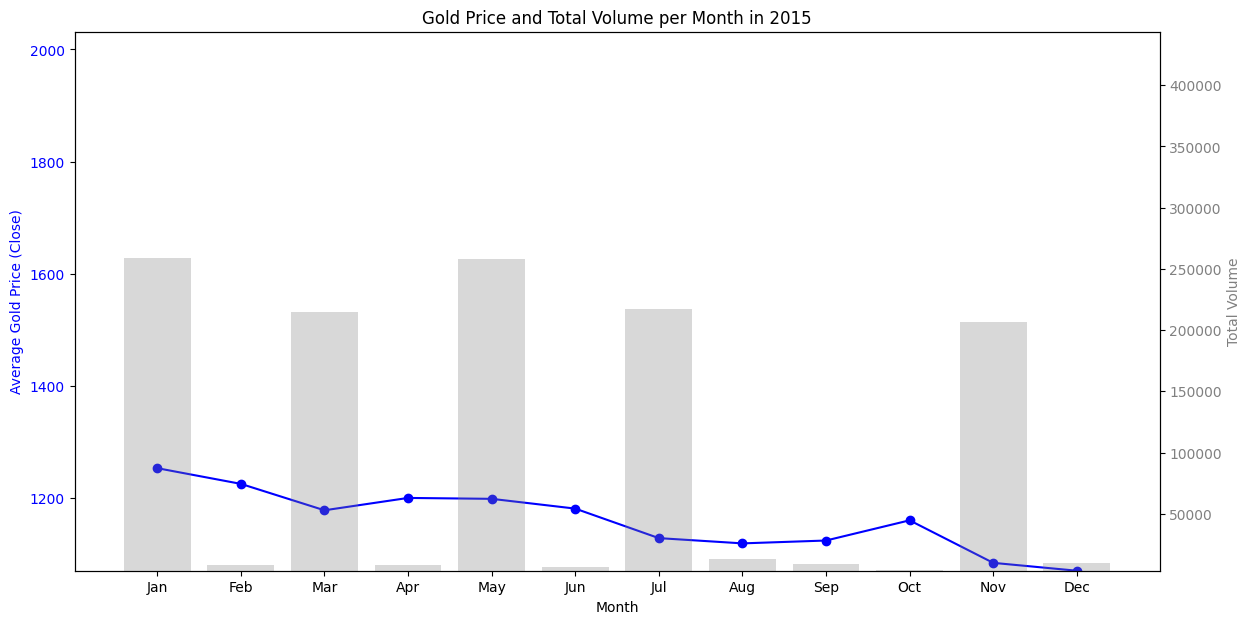

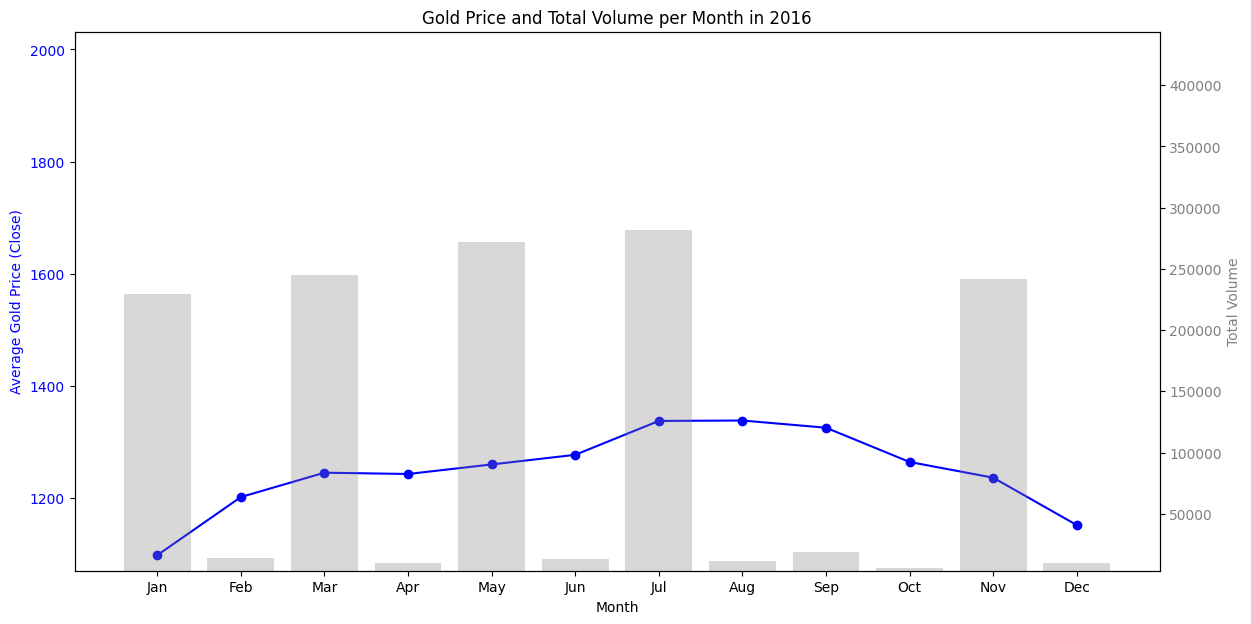

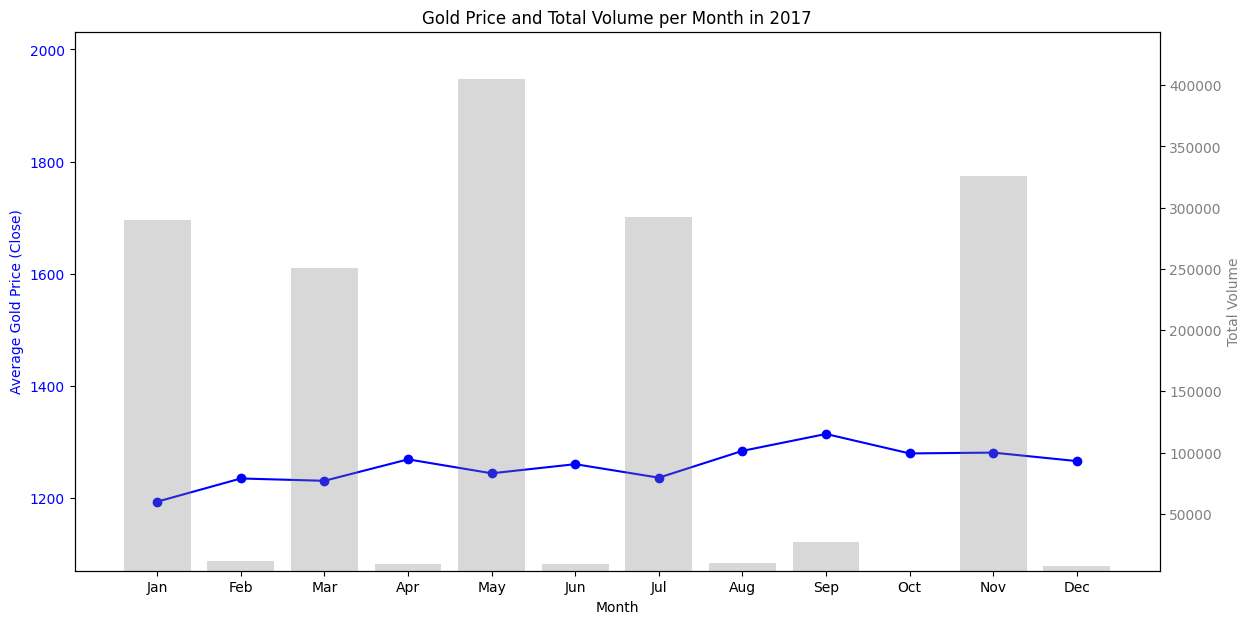

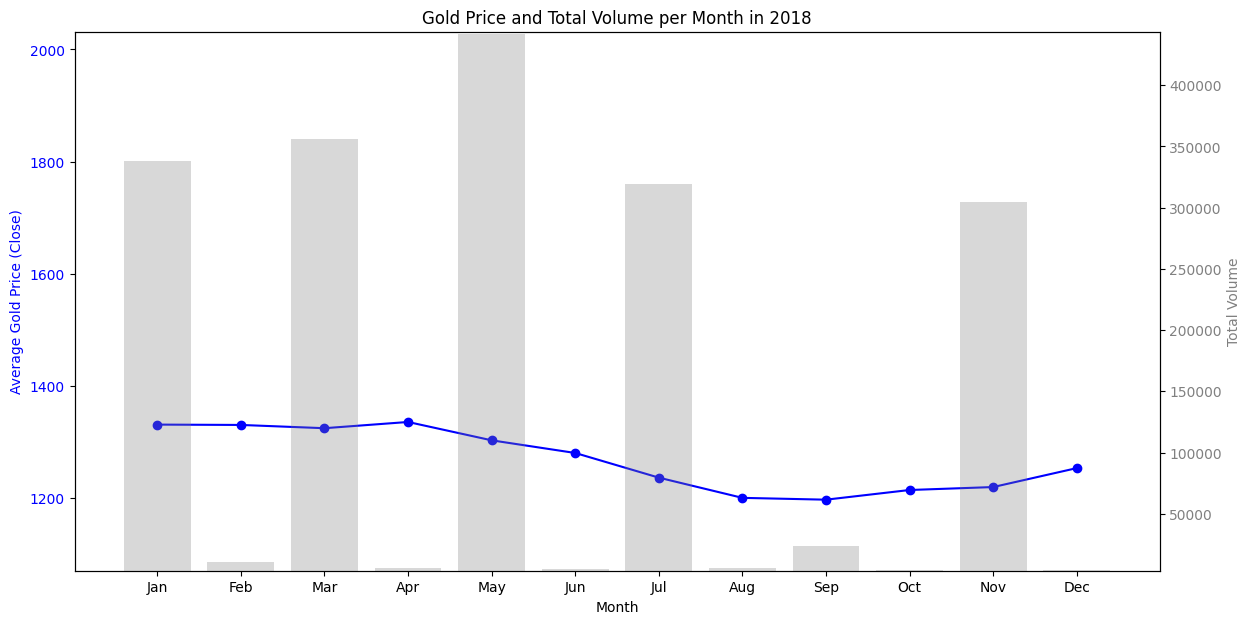

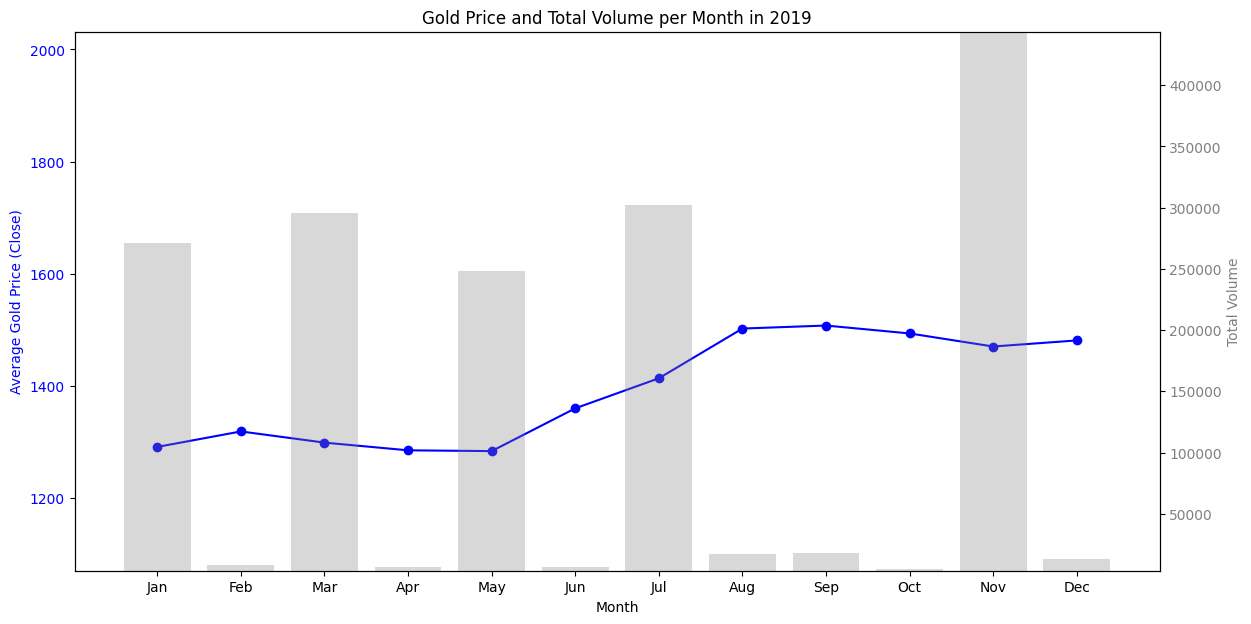

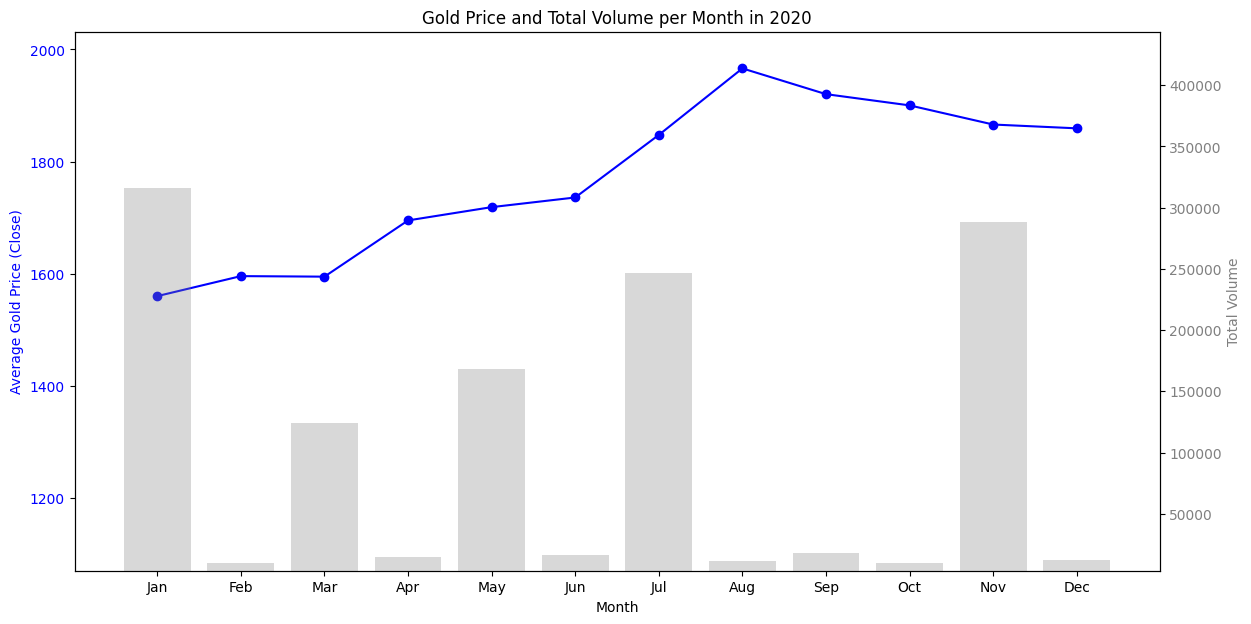

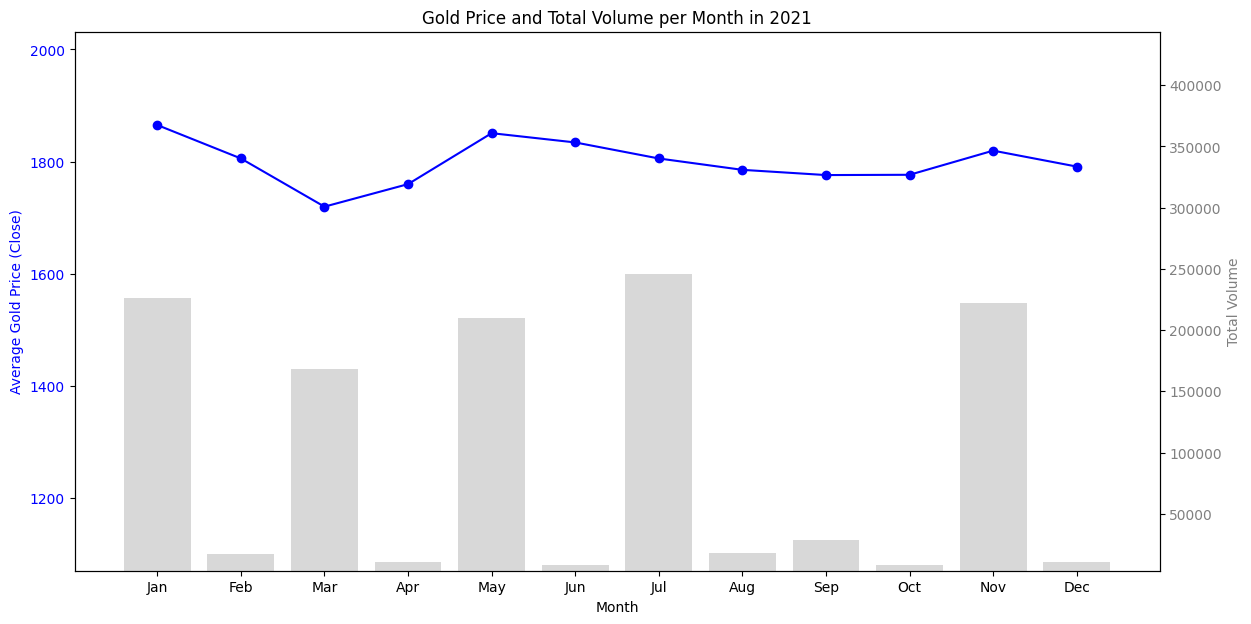

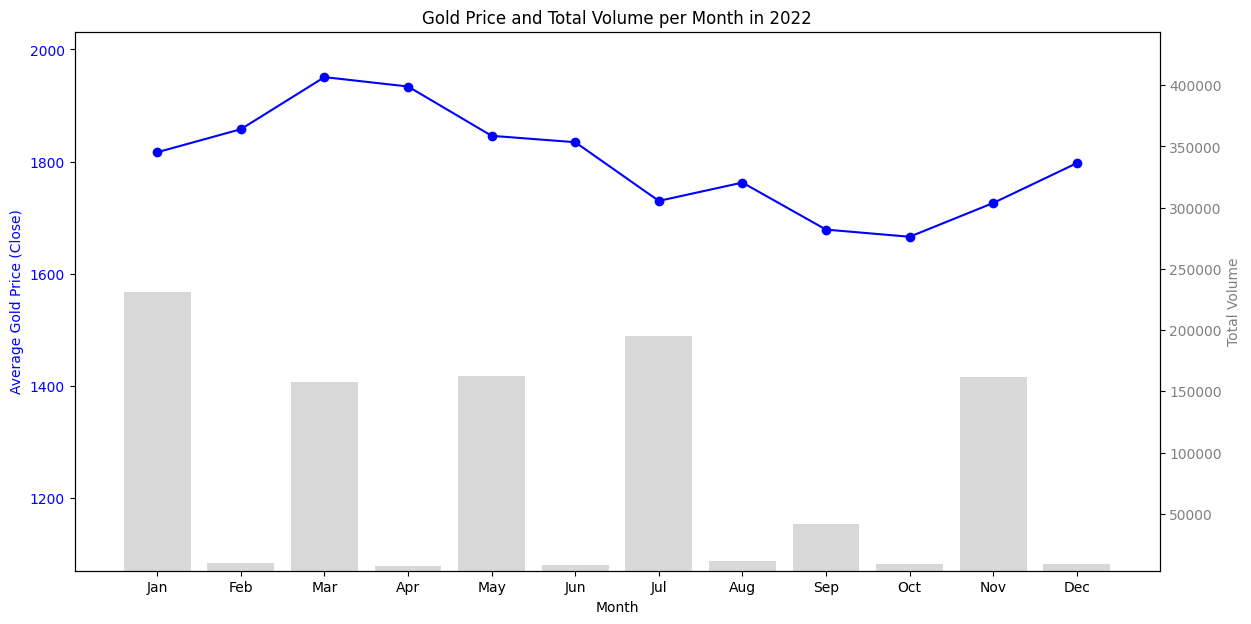

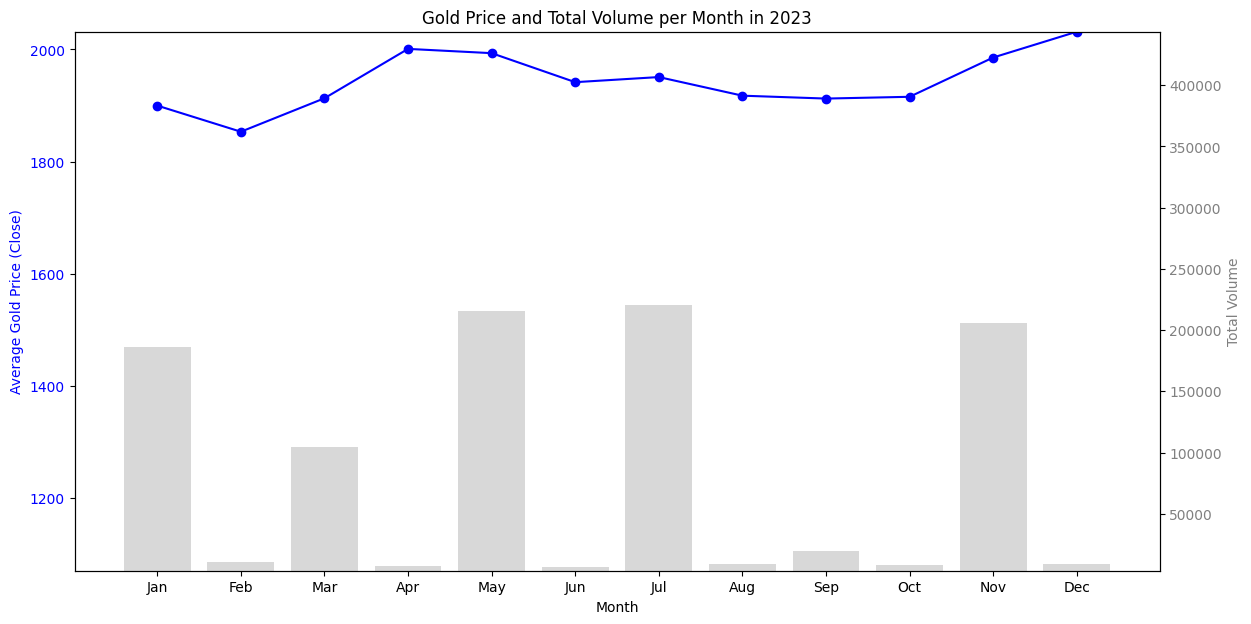

In [8]:

# Añadir columnas de año y mes
df_gold['Year'] = df_gold.index.year
df_gold['Month'] = df_gold.index.month

# Agrupar por año y mes y calcular el volumen total y el precio promedio de cierre
monthly_data = df_gold.groupby(['Year', 'Month']).agg({'Volume': 'sum', 'Close': 'mean'}).reset_index()

# Encontrar los límites de los ejes para mantener la escala uniforme
max_volume = monthly_data['Volume'].max()
min_volume = monthly_data['Volume'].min()
max_close = monthly_data['Close'].max()
min_close = monthly_data['Close'].min()

# Crear gráficos individuales para cada año del 2014 al 2023
years = range(2014, 2024)
for year in years:
    data_year = monthly_data[monthly_data['Year'] == year]
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Gráfico del precio del oro
    ax1.plot(data_year['Month'], data_year['Close'], color='blue', marker='o')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Gold Price (Close)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax1.set_ylim(min_close, max_close)
    
    # Crear un segundo eje para el volumen
    ax2 = ax1.twinx()
    ax2.bar(data_year['Month'], data_year['Volume'], alpha=0.3, color='grey')
    ax2.set_ylabel('Total Volume', color='grey')
    ax2.tick_params(axis='y', labelcolor='grey')
    ax2.set_ylim(min_volume, max_volume)
    
    plt.title(f'Gold Price and Total Volume per Month in {year}')
    plt.show()


Convertimos el DataFrame de Yahoo Finance en un CSV
Posteriormente realizamos el análisis anterior en trimestres, ya que 
parece que los datos del volumen son bimensuales.


In [9]:
df_gold.to_csv('GC_F_data.csv')

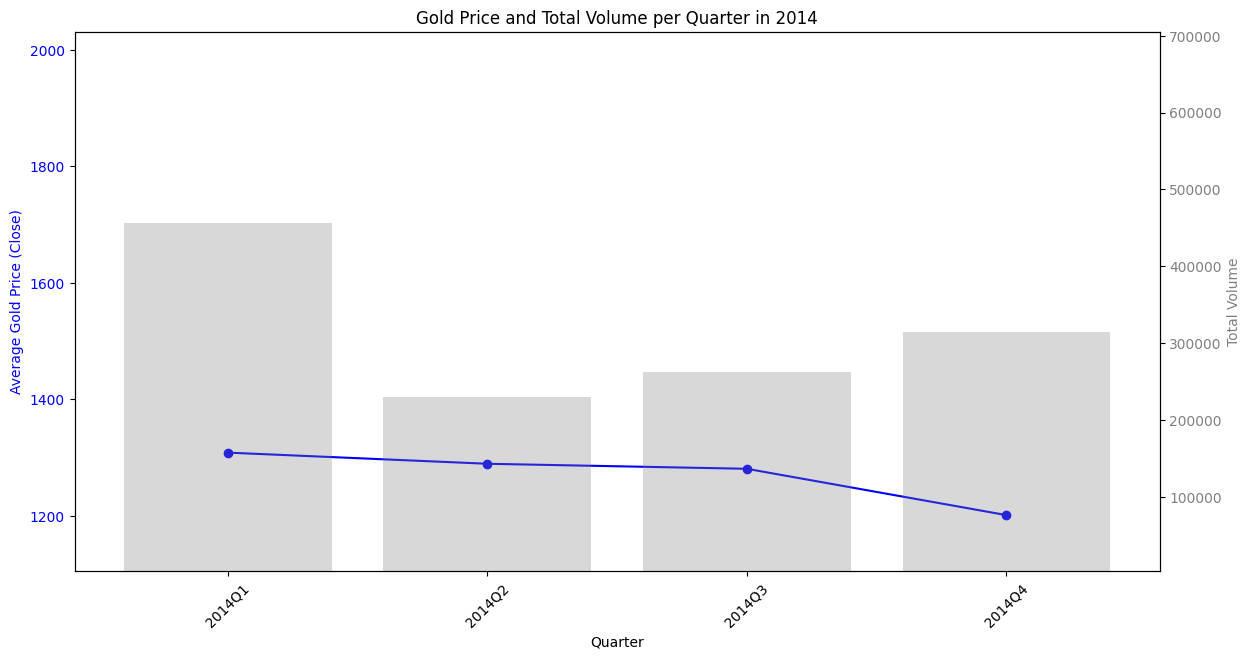

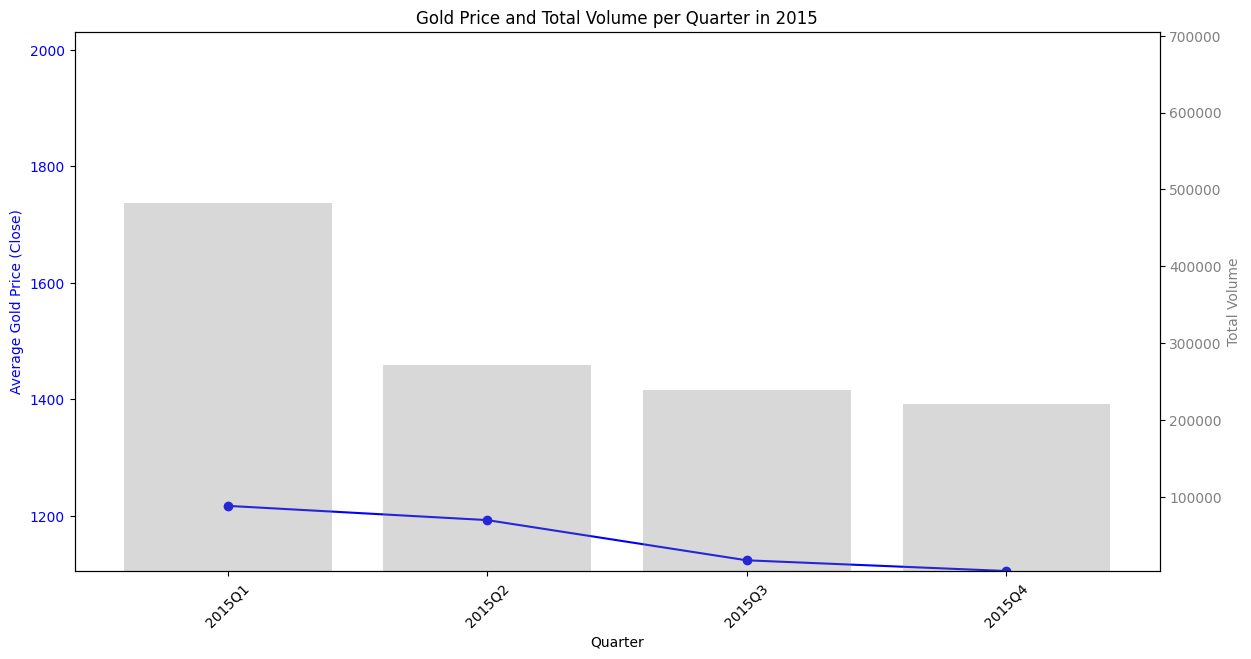

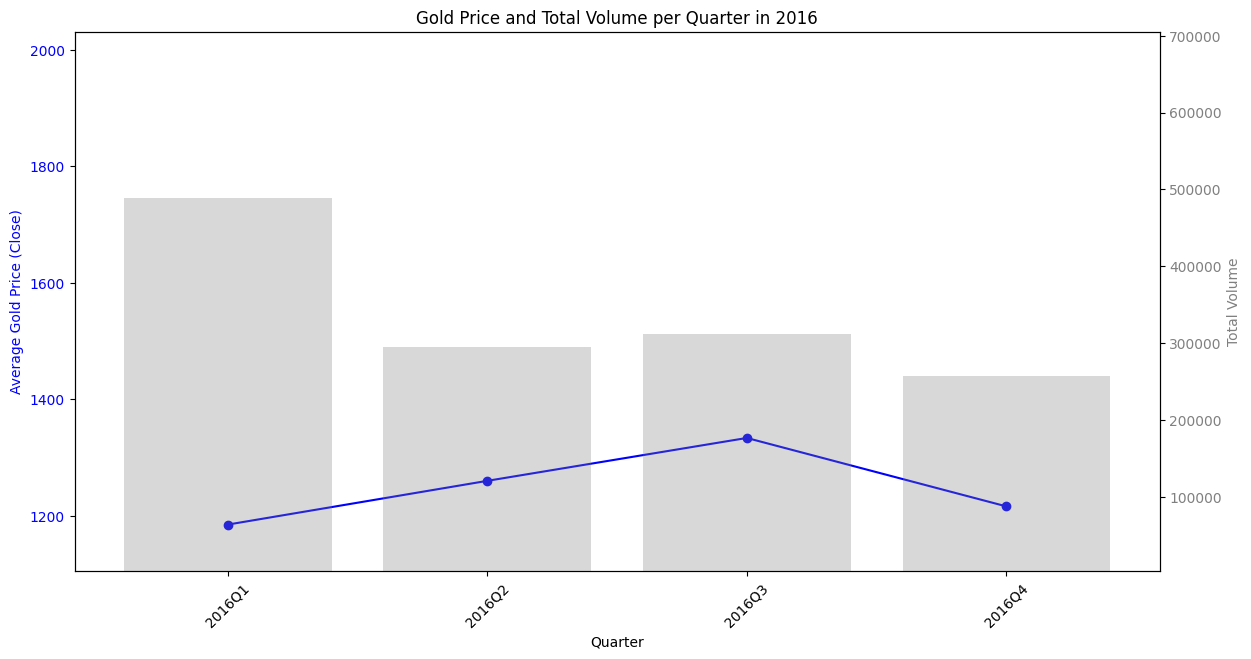

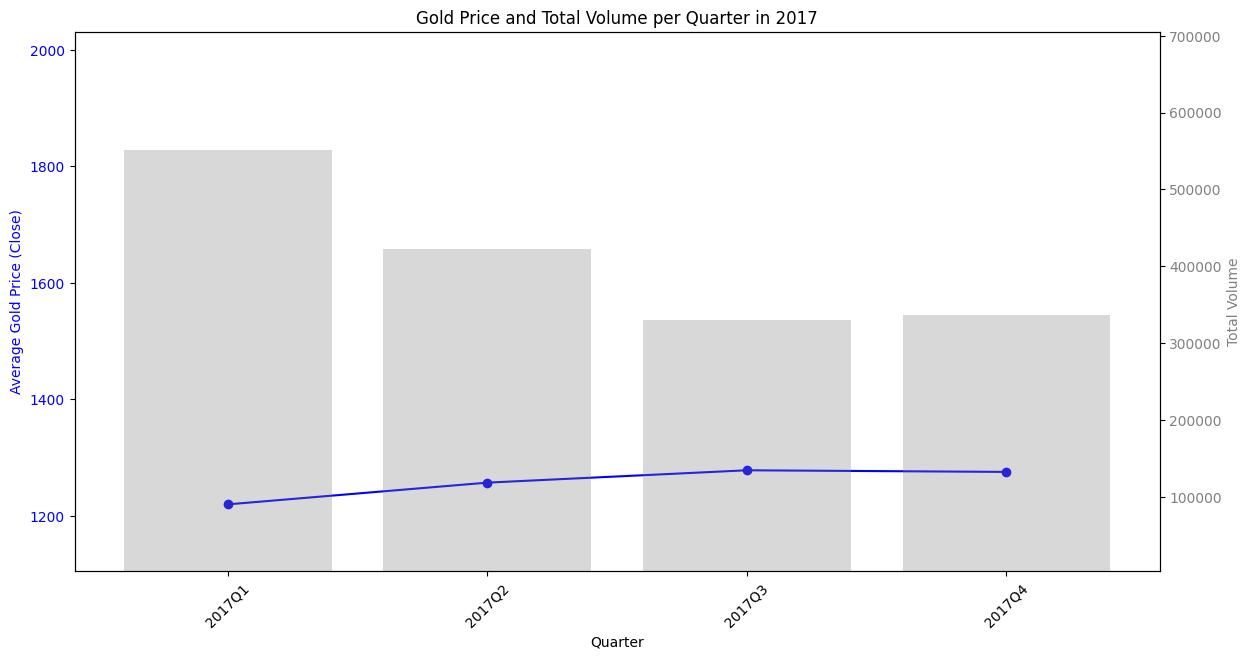

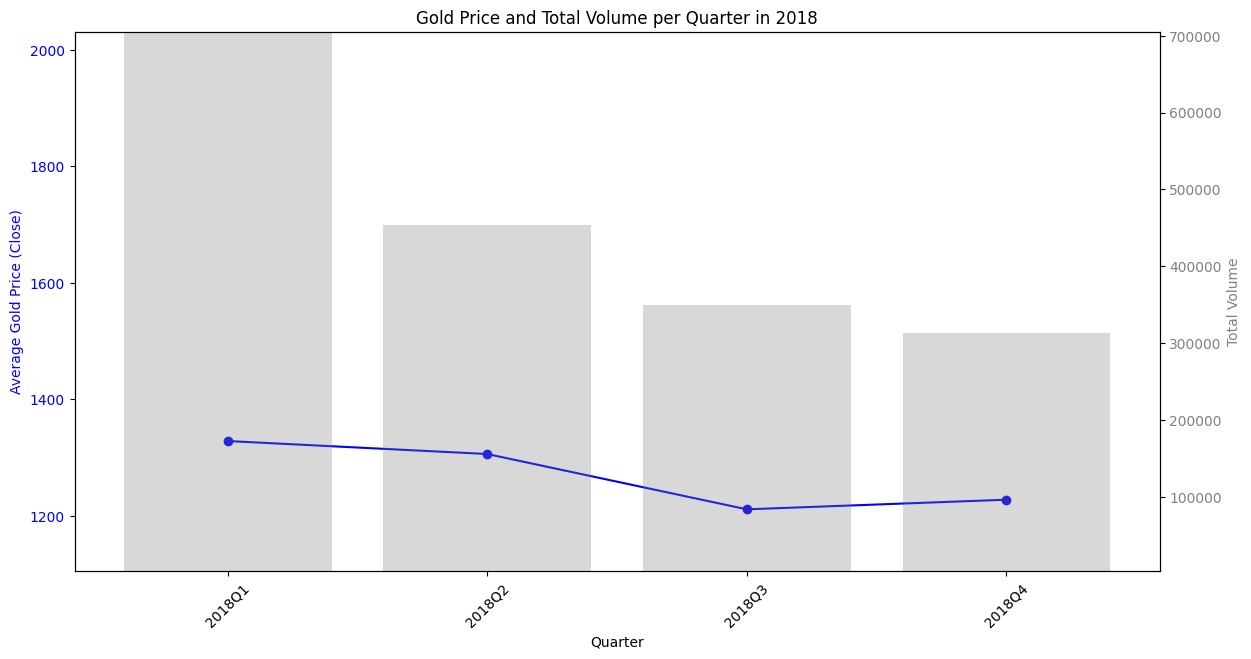

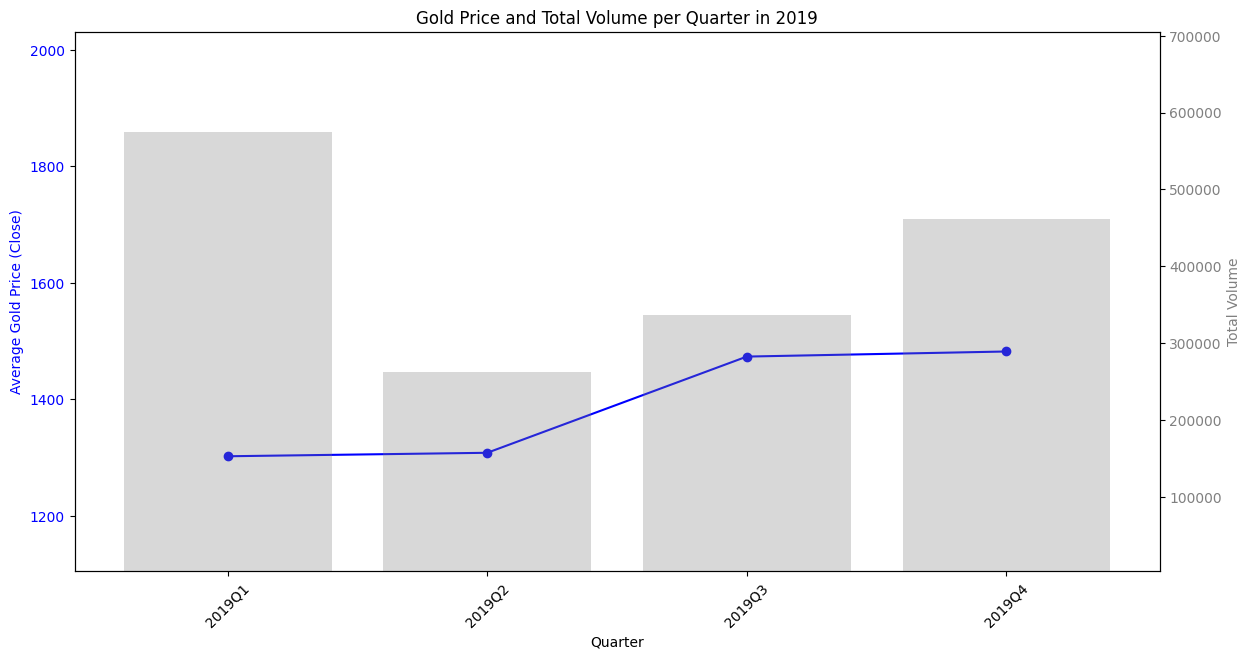

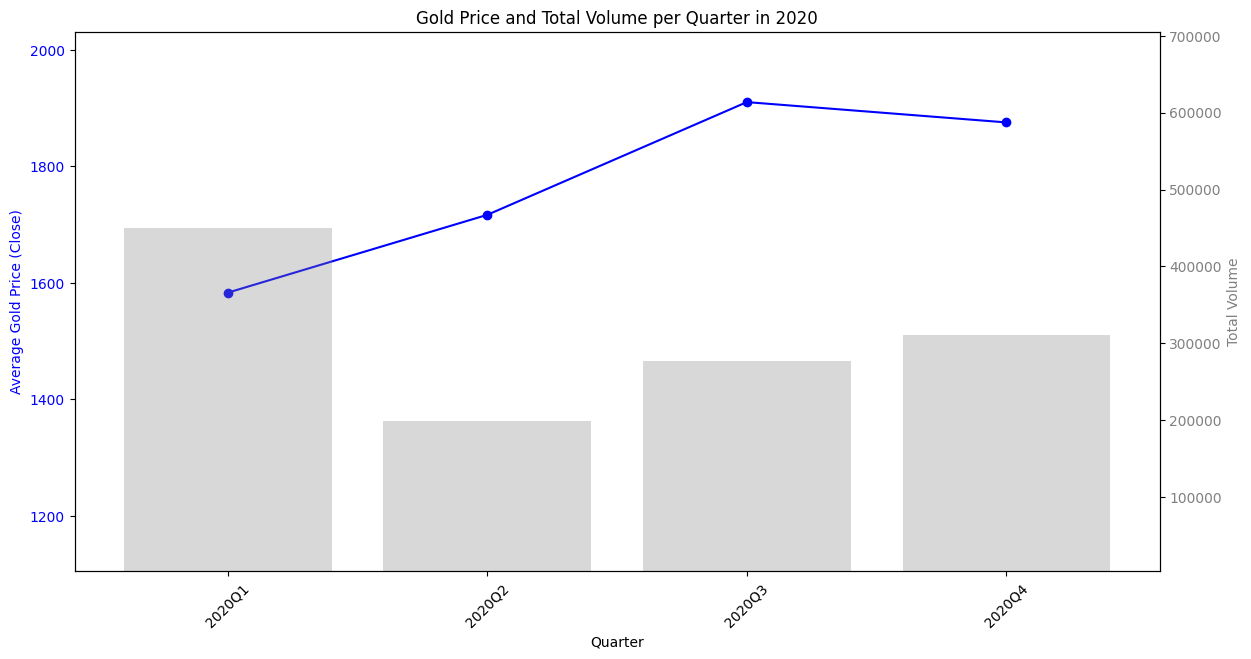

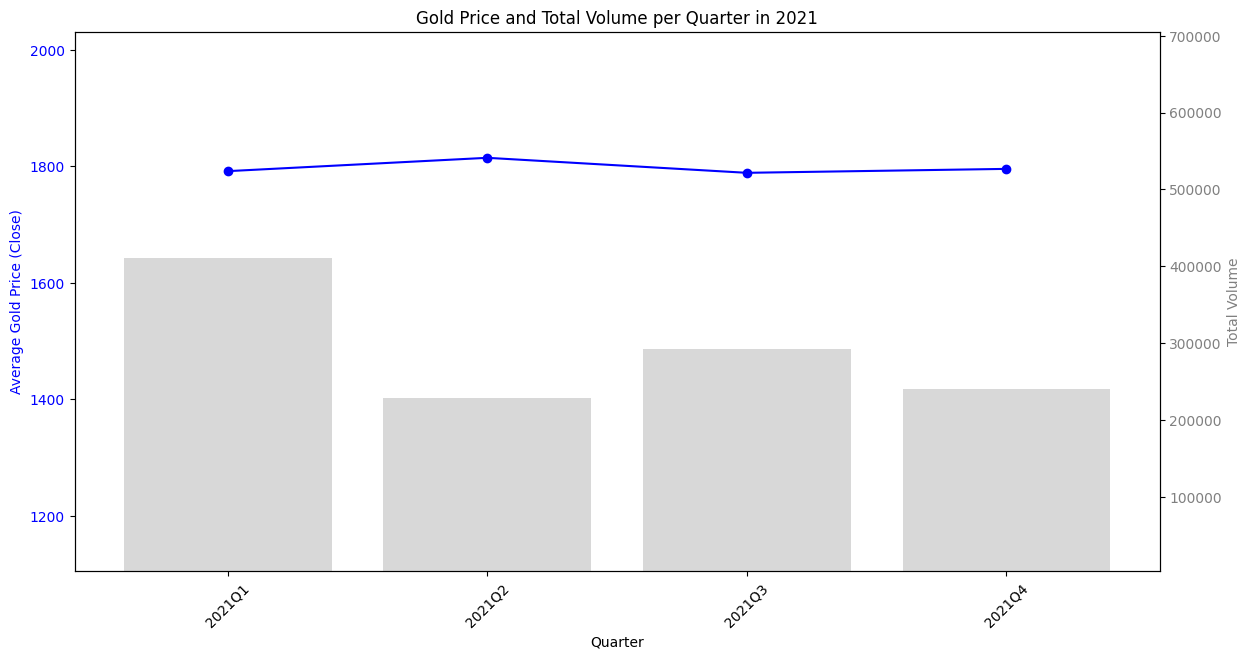

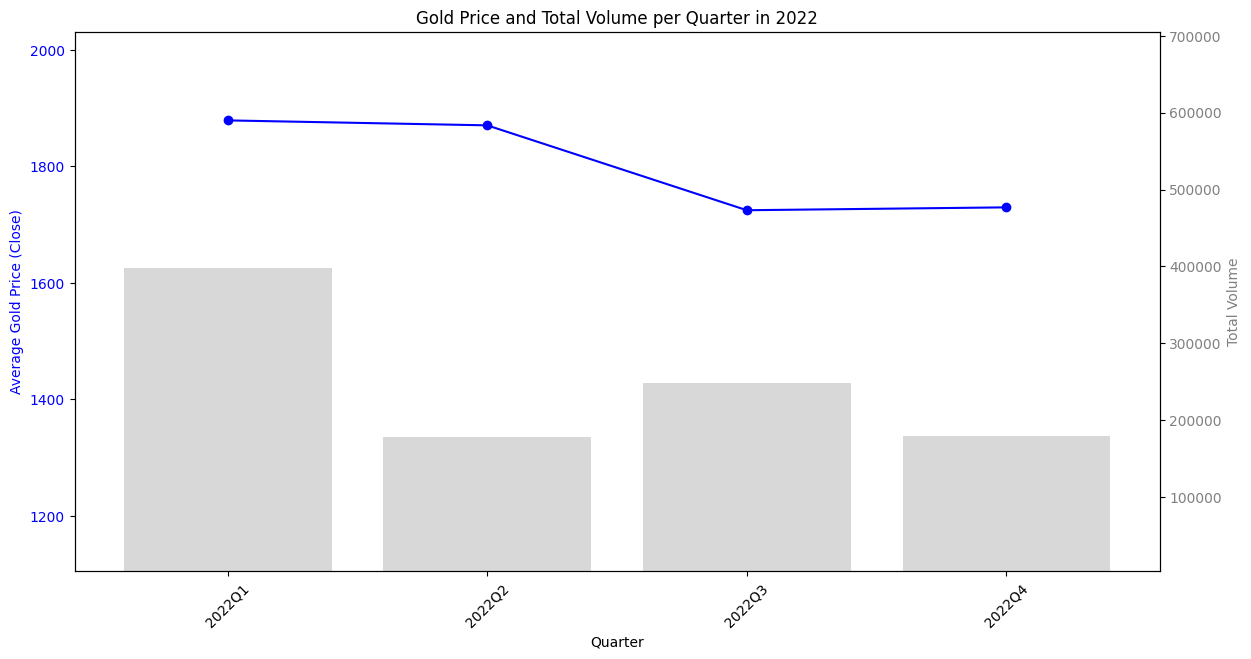

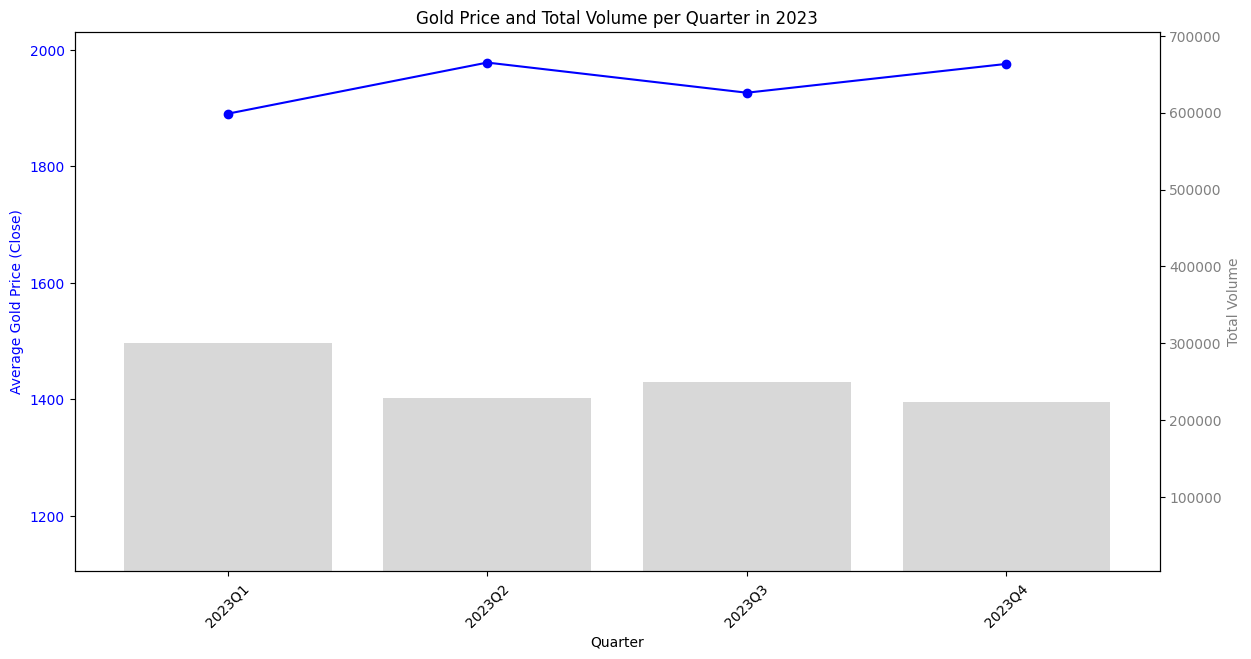

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV proporcionado
file_path = 'GC_F_data.csv'
df_gc_f = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Añadir columna de trimestre
df_gc_f['Quarter'] = df_gc_f.index.to_period('Q')

# Agrupar por año y trimestre y calcular el volumen total y el precio promedio de cierre
df_gc_f['Year'] = df_gc_f.index.year
quarterly_data_gc_f = df_gc_f.groupby(['Year', 'Quarter']).agg({'Volume': 'sum', 'Close': 'mean'}).reset_index()

# Encontrar los límites de los ejes para mantener la escala uniforme
max_volume_gc_f = quarterly_data_gc_f['Volume'].max()
min_volume_gc_f = quarterly_data_gc_f['Volume'].min()
max_close_gc_f = quarterly_data_gc_f['Close'].max()
min_close_gc_f = quarterly_data_gc_f['Close'].min()

# Crear gráficos individuales para cada año del 2014 al 2023
years = range(2014, 2024)
for year in years:
    data_year_gc_f = quarterly_data_gc_f[quarterly_data_gc_f['Year'] == year]
    
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Gráfico del precio del oro
    ax1.plot(data_year_gc_f['Quarter'].astype(str), data_year_gc_f['Close'], color='blue', marker='o')
    ax1.set_xlabel('Quarter')
    ax1.set_ylabel('Average Gold Price (Close)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(len(data_year_gc_f['Quarter'])))
    ax1.set_xticklabels(data_year_gc_f['Quarter'].astype(str), rotation=45)
    ax1.set_ylim(min_close_gc_f, max_close_gc_f)
    
    # Crear un segundo eje para el volumen
    ax2 = ax1.twinx()
    ax2.bar(range(len(data_year_gc_f['Quarter'])), data_year_gc_f['Volume'], alpha=0.3, color='grey')
    ax2.set_ylabel('Total Volume', color='grey')
    ax2.tick_params(axis='y', labelcolor='grey')
    ax2.set_ylim(min_volume_gc_f, max_volume_gc_f)
    
    plt.title(f'Gold Price and Total Volume per Quarter in {year}')
    plt.show()


### TAREAS CONJUNTO DE DATOS ###
### 'Stock Market Dataset.csv' ###

### Origen: Kaggle ###
### Nombre del DataFrame: stock_market

In [11]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'Stock Market Dataset.csv'
stock_market = pd.read_csv(file_path)

# Descripción general
print("Información general del dataset:")
print(stock_market.info())
print("\nDescripción estadística del dataset:")
print(stock_market.describe())
print("\nValores nulos por columna:")
print(stock_market.isnull().sum())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   obje

In [12]:
# Convertir la columna 'Date' a un formato de fecha compatible
stock_market['Date'] = pd.to_datetime(stock_market['Date'], format='%d-%m-%Y')

# Eliminar la columna 'Unnamed: 0' 
stock_market = stock_market.drop(columns=['Unnamed: 0'])

# Descripción general
print("Información general del dataset:")
print(stock_market.info())
print("\nDescripción estadística del dataset:")
print(stock_market.describe())

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(stock_market.isnull().sum())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1243 non-null   datetime64[ns]
 1   Natural_Gas_Price  1243 non-null   float64       
 2   Natural_Gas_Vol.   1239 non-null   float64       
 3   Crude_oil_Price    1243 non-null   float64       
 4   Crude_oil_Vol.     1220 non-null   float64       
 5   Copper_Price       1243 non-null   float64       
 6   Copper_Vol.        1206 non-null   float64       
 7   Bitcoin_Price      1243 non-null   object        
 8   Bitcoin_Vol.       1243 non-null   float64       
 9   Platinum_Price     1243 non-null   object        
 10  Platinum_Vol.      636 non-null    float64       
 11  Ethereum_Price     1243 non-null   object        
 12  Ethereum_Vol.      1243 non-null   float64       
 13  S&P_500_Price      1243 non-nu

In [13]:
# Filtrar las filas donde los valores de "Silver_Vol." son nulos
df_silver_vol_na = stock_market[stock_market['Silver_Vol.'].isna()]

# Filtrar las columnas relevantes para la visualización solicitada
df_silver_vol_na_filtered = df_silver_vol_na[['Date', 'Silver_Price', 'Silver_Vol.']]

# Mostrar las filas filtradas
df_silver_vol_na_filtered

,Date,Silver_Price,Silver_Vol.
0,2024-02-02,22.796,NaN
17,2024-01-09,23.091,NaN
18,2024-01-08,23.310,NaN
19,2024-01-05,23.315,NaN
20,2024-01-04,23.187,NaN
21,2024-01-03,23.157,NaN
22,2024-01-02,23.953,NaN
23,2023-12-29,24.025,NaN
24,2023-12-28,24.372,NaN
25,2023-12-27,24.570,NaN


In [14]:
# Rellenar los valores nulos en el volumen de la plata con el valor anterior existente
stock_market['Silver_Vol.'] = stock_market['Silver_Vol.'].ffill()

# Verificar los cambios mostrando las primeras filas donde el volumen de la plata es nulo originalmente
df_silver_vol_na_filled = stock_market[stock_market.index.isin(df_silver_vol_na.index)][['Date', 'Silver_Price', 'Silver_Vol.']]

# Mostrar las primeras filas para verificar
df_silver_vol_na_filled.head()


,Date,Silver_Price,Silver_Vol.
0,2024-02-02,22.796,NaN
17,2024-01-09,23.091,80.0
18,2024-01-08,23.310,80.0
19,2024-01-05,23.315,80.0
20,2024-01-04,23.187,80.0


In [15]:
# Rellenar los valores nulos en el resto de casos con el valor anterior existente
stock_market['Crude_oil_Vol.'] = stock_market['Crude_oil_Vol.'].ffill()
stock_market['Copper_Vol.'] = stock_market['Copper_Vol.'].ffill()
stock_market['Platinum_Vol.'] = stock_market['Platinum_Vol.'].ffill()

In [16]:
# Lista de columnas que necesitan ser rellenadas
columns_to_fill = ['Silver_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.', 'Natural_Gas_Vol.', 'Nasdaq_100_Vol.','Gold_Vol.']

# Rellenar los valores nulos en las columnas especificadas con el valor anterior existente y luego con el siguiente valor existente
for column in columns_to_fill:
    stock_market[column] = stock_market[column].ffill() .bfill() 

# Verificar si todavía existen valores nulos
null_values_after_fill = stock_market[columns_to_fill].isnull().sum()

# Mostrar los resultados de la verificación
print("Valores nulos después de rellenar:")
print(null_values_after_fill)


Valores nulos después de rellenar:
Silver_Vol.         0
Crude_oil_Vol.      0
Copper_Vol.         0
Platinum_Vol.       0
Natural_Gas_Vol.    0
Nasdaq_100_Vol.     0
Gold_Vol.           0
dtype: int64


In [17]:
# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(stock_market.isnull().sum())


Valores nulos por columna:
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


In [18]:
# Volvemos a describir el dataset:
# Descripción general
print("Información general del dataset:")
print(stock_market.info())
print("\nDescripción estadística del dataset:")
print(stock_market.describe())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1243 non-null   datetime64[ns]
 1   Natural_Gas_Price  1243 non-null   float64       
 2   Natural_Gas_Vol.   1243 non-null   float64       
 3   Crude_oil_Price    1243 non-null   float64       
 4   Crude_oil_Vol.     1243 non-null   float64       
 5   Copper_Price       1243 non-null   float64       
 6   Copper_Vol.        1243 non-null   float64       
 7   Bitcoin_Price      1243 non-null   object        
 8   Bitcoin_Vol.       1243 non-null   float64       
 9   Platinum_Price     1243 non-null   object        
 10  Platinum_Vol.      1243 non-null   float64       
 11  Ethereum_Price     1243 non-null   object        
 12  Ethereum_Vol.      1243 non-null   float64       
 13  S&P_500_Price      1243 non-nu

In [19]:
# Seleccionar solo las columnas que necesitamos
columns_of_interest = [
    'Date',
    'Bitcoin_Price',
    'Silver_Price',
    'Nasdaq_100_Price'
]
stock_market_filtered = stock_market[columns_of_interest]

# Descripción general
print("Información general del dataset:")
print(stock_market_filtered.info())
print("\nDescripción estadística del dataset:")
print(stock_market_filtered.describe())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1243 non-null   datetime64[ns]
 1   Bitcoin_Price     1243 non-null   object        
 2   Silver_Price      1243 non-null   float64       
 3   Nasdaq_100_Price  1243 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 39.0+ KB
None

Descripción estadística del dataset:
       Silver_Price
count   1243.000000
mean      21.588977
std        3.859288
min       11.772000
25%       17.998500
50%       22.758000
75%       24.512000
max       29.418000


In [20]:
print(stock_market_filtered)

           Date Bitcoin_Price  Silver_Price Nasdaq_100_Price
0    2024-02-02     43,194.70        22.796        17,642.73
1    2024-02-01     43,081.40        23.236        17,344.71
2    2024-01-31     42,580.50        23.169        17,137.24
3    2024-01-30     42,946.20        23.225        17,476.71
4    2024-01-29     43,299.80        23.134        17,596.27
...         ...           ...           ...              ...
1238 2019-02-08      3,661.70        15.809         6,913.13
1239 2019-02-07      3,397.70        15.713         6,904.98
1240 2019-02-06      3,404.30        15.701         6,997.62
1241 2019-02-05      3,468.40        15.836         7,023.52
1242 2019-02-04      3,462.80        15.886         6,959.96

[1243 rows x 4 columns]


In [21]:

# Limpiar y convertir a numérico 'Bitcoin_Price' y 'Nasdaq_100_Price'
stock_market_filtered.loc[:, 'Bitcoin_Price'] = stock_market_filtered['Bitcoin_Price'].replace({',': ''}, regex=True).astype(float)
stock_market_filtered.loc[:, 'Nasdaq_100_Price'] = stock_market_filtered['Nasdaq_100_Price'].replace({',': ''}, regex=True).astype(float)

# Verificar los cambios
print(stock_market_filtered.dtypes)
print(stock_market_filtered[['Bitcoin_Price', 'Nasdaq_100_Price']].head())

Date                datetime64[ns]
Bitcoin_Price              float64
Silver_Price               float64
Nasdaq_100_Price           float64
dtype: object
   Bitcoin_Price  Nasdaq_100_Price
0        43194.7          17642.73
1        43081.4          17344.71
2        42580.5          17137.24
3        42946.2          17476.71
4        43299.8          17596.27


/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2072320601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_market_filtered.loc[:, 'Bitcoin_Price'] = stock_market_filtered['Bitcoin_Price'].replace({',': ''}, regex=True).astype(float)
/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2072320601.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_market_filtered.loc[:, 'Bitcoin_Price'] = stock_market_filtered['Bitcoin_Price'].replace({',': ''}, regex=True).astype(float)
/var/folders/v

In [22]:
# Descripción general para comprobar correcciones
print("Información general del dataset:")
print(stock_market_filtered.info())
print("\nDescripción estadística del dataset:")
print(stock_market_filtered.describe())
print(stock_market_filtered)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1243 non-null   datetime64[ns]
 1   Bitcoin_Price     1243 non-null   float64       
 2   Silver_Price      1243 non-null   float64       
 3   Nasdaq_100_Price  1243 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 39.0 KB
None

Descripción estadística del dataset:
       Bitcoin_Price  Silver_Price  Nasdaq_100_Price
count    1243.000000   1243.000000       1243.000000
mean    25241.903057     21.588977      12037.318101
std     16029.009055      3.859288       2887.069742
min      3397.700000     11.772000       6904.980000
25%     10014.600000     17.998500       9298.730000
50%     23055.100000     22.758000      12381.170000
75%     37784.200000     24.512000      14563.250000
max     67

Los siguientes gráficos son para comprobar en 
otros sitios de inversión y comprobar que seguimos un camino correcto

/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2453829242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_market_filtered.loc[:, 'Date'] = pd.to_datetime(stock_market_filtered['Date'], errors='coerce')
/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2453829242.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  stock_market_filtered.loc[:, 'Date'] = pd.to_datetime(stock_market_filtered['Date'], errors='coerce')


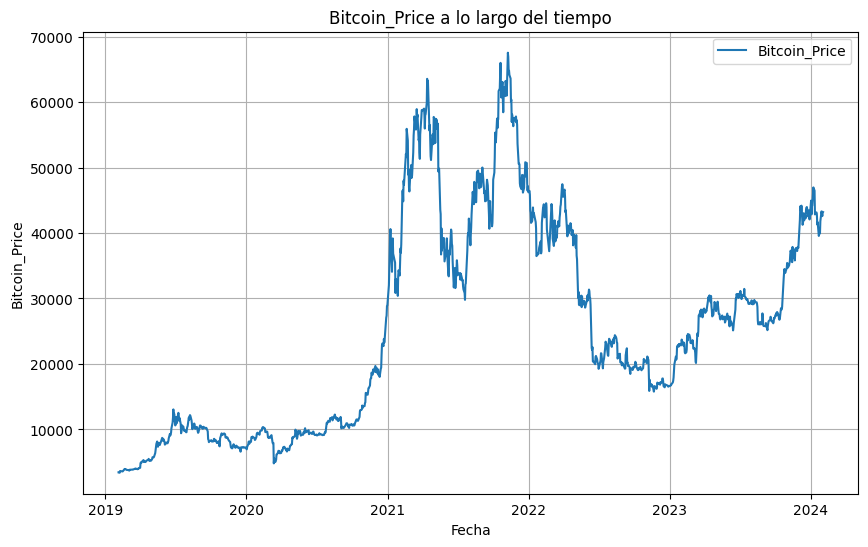

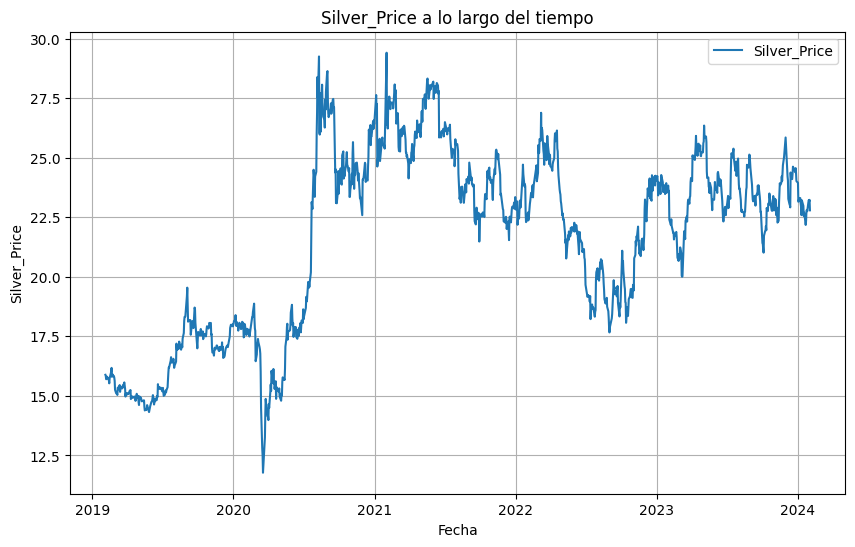

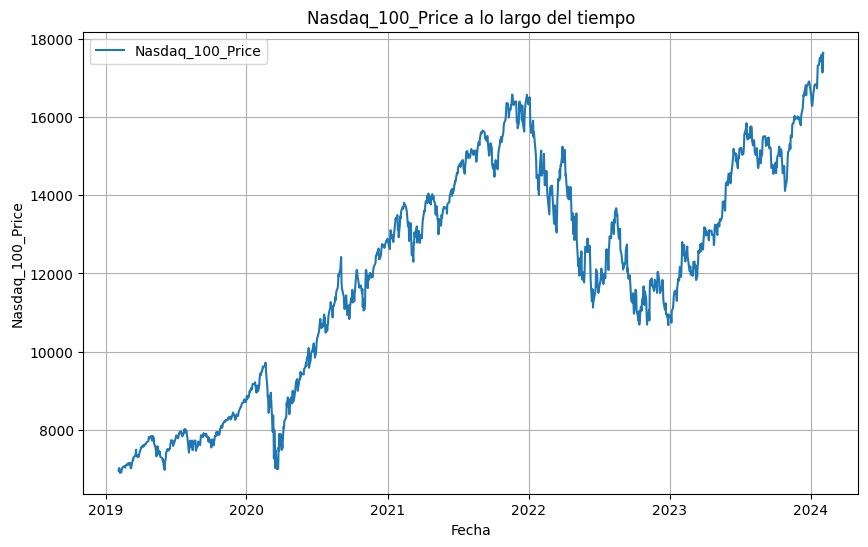

In [23]:
import matplotlib.pyplot as plt

# Convertir la columna de fechas a un formato datetime, si no está ya convertido
# stock_market_filtered['Date'] = pd.to_datetime(stock_market_filtered['Date'], errors='coerce')
stock_market_filtered.loc[:, 'Date'] = pd.to_datetime(stock_market_filtered['Date'], errors='coerce')

# Lista de columnas de precios y volúmenes (excluyendo la fecha)
columns_to_plot = [col for col in stock_market_filtered.columns if col not in ['Unnamed: 0', 'Date']]

# Crear un gráfico para cada columna
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(stock_market_filtered['Date'], stock_market_filtered[column], label=column)
    plt.xlabel('Fecha')
    plt.ylabel(column)
    plt.title(f'{column} a lo largo del tiempo')
    plt.legend()
    plt.grid(True)
    plt.show()


### TAREAS CONJUNTO DE DATOS ###
### 'XAUUSD_2010-2023.csv' ###

### Origen: ??? ###
### Nombre del DataFrame: xauusd

In [24]:

# Cargar el archivo CSV
file_path = 'XAUUSD_2010-2023.csv'
xauusd = pd.read_csv(file_path)

# Descripción general
print("Información general del dataset:")
print(xauusd.info())
print("\nDescripción estadística del dataset:")
print(xauusd.describe())
print(xauusd)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986004 entries, 0 to 986003
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    986004 non-null  object 
 1   open    986004 non-null  float64
 2   high    986004 non-null  float64
 3   low     986004 non-null  float64
 4   close   986004 non-null  float64
 5   rsi14   986004 non-null  float64
 6   sma14   986004 non-null  float64
dtypes: float64(6), object(1)
memory usage: 52.7+ MB
None

Descripción estadística del dataset:
                open           high            low          close  \
count  986004.000000  986004.000000  986004.000000  986004.000000   
mean     1480.687806    1481.201203    1480.169858    1480.688379   
std       269.235947     269.360461     269.108012     269.235929   
min      1046.920000    1048.080000    1044.180000    1046.940000   
25%      1252.750000    1253.080000    1252.400000    1252.750000   
50%  

In [25]:
# Convertir la columna 'time' a un formato de fecha
xauusd['time'] = pd.to_datetime(xauusd['time'])
# Extraer solo las columnas de interés
xauusd_filtered = xauusd[['time', 'rsi14', 'sma14']]
# Crear una columna 'date' que solo contenga la fecha sin la hora
xauusd_filtered.loc[:, 'date'] = xauusd_filtered['time'].dt.date
# Calcular la media diaria de 'rsi14' y 'sma14'
xauusd_daily = xauusd_filtered.groupby('date').agg({'rsi14': 'mean', 'sma14': 'mean'}).reset_index()
# Convertir 'date' a datetime
xauusd_daily['date'] = pd.to_datetime(xauusd_daily['date'])

/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/1374386683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xauusd_filtered.loc[:, 'date'] = xauusd_filtered['time'].dt.date


In [26]:
# Descripción general
print("Información general del dataset:")
print(xauusd_daily.info())
print("\nDescripción estadística del dataset:")
print(xauusd_daily.describe())
# Mostrar el resultado
print(xauusd_daily.head())
print(xauusd_daily.tail())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4353 non-null   datetime64[ns]
 1   rsi14   4353 non-null   float64       
 2   sma14   4353 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 102.1 KB
None

Descripción estadística del dataset:
             rsi14        sma14
count  4353.000000  4353.000000
mean     50.407766  1484.841644
std       4.177207   271.763375
min      31.470667  1056.329722
25%      47.776389  1253.075735
50%      50.326812  1380.867206
75%      52.791520  1738.184130
max      79.080667  2091.748333
        date      rsi14        sma14
0 2010-01-03  56.271806  1097.092500
1 2010-01-04  57.883830  1115.956454
2 2010-01-05  50.596500  1122.012893
3 2010-01-06  51.419929  1130.732456
4 2010-01-07  46.572527  1130.280890
           date      rsi14 

/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/1157277543.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  'rsi14': pd.np.random.uniform(31.470667, 79.080667, 4353),
/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/1157277543.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  'sma14': pd.np.random.uniform(1056.329722, 2091.748333, 4353)


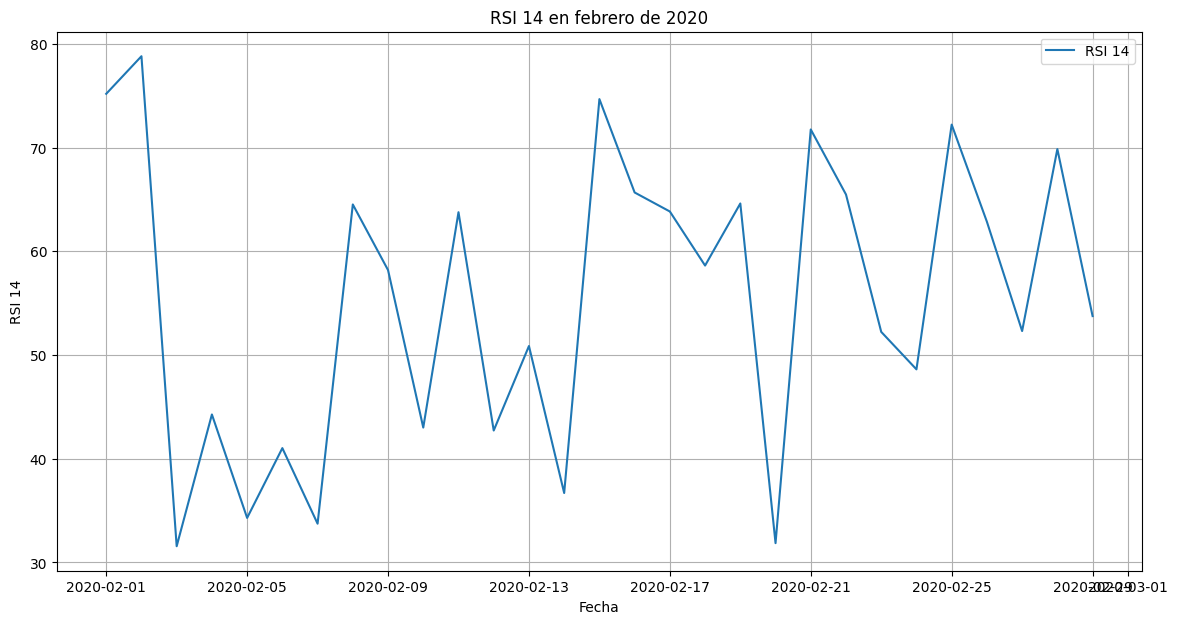

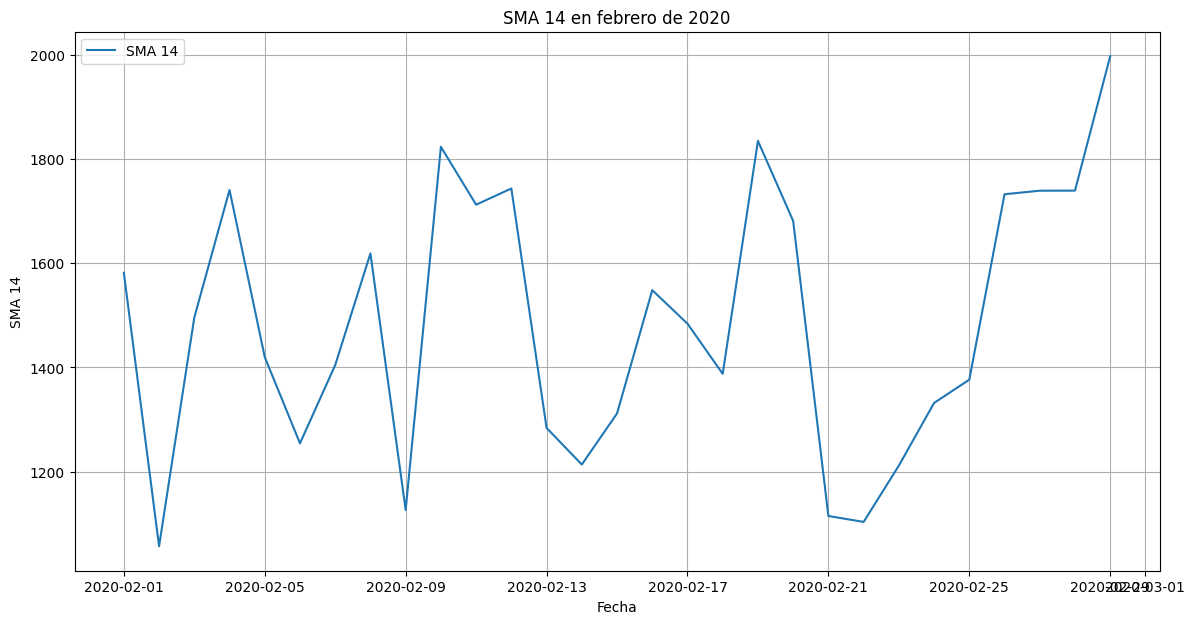

In [27]:
# Crear el DataFrame basado en los datos proporcionados (asegúrate de usar tu dataset real)
# Este es un ejemplo y debe ser reemplazado por tu dataset real
xauusd_daily = pd.DataFrame({
    'date': pd.date_range(start='2010-01-03', periods=4353, freq='D'),
    'rsi14': pd.np.random.uniform(31.470667, 79.080667, 4353),
    'sma14': pd.np.random.uniform(1056.329722, 2091.748333, 4353)
})

# Filtrar los datos para el mes de febrero de 2020
february_2020_data = xauusd_daily[(xauusd_daily['date'] >= '2020-02-01') & (xauusd_daily['date'] <= '2020-02-29')]

# Crear la gráfica para RSI 14 en febrero de 2020
plt.figure(figsize=(14, 7))
plt.plot(february_2020_data['date'], february_2020_data['rsi14'], label='RSI 14')
plt.xlabel('Fecha')
plt.ylabel('RSI 14')
plt.title('RSI 14 en febrero de 2020')
plt.legend()
plt.grid(True)
plt.show()

# Crear la gráfica para SMA 14 en febrero de 2020
plt.figure(figsize=(14, 7))
plt.plot(february_2020_data['date'], february_2020_data['sma14'], label='SMA 14')
plt.xlabel('Fecha')
plt.ylabel('SMA 14')
plt.title('SMA 14 en febrero de 2020')
plt.legend()
plt.grid(True)
plt.show()


INDICADOR TÉNICO: EL MACD

In [28]:
df_gold['Close'] = df_gold['Close'].astype(float)  # Asegurarse de que los precios de cierre sean float

# Cálculo de la EMA de 12 días
df_gold['EMA_12'] = df_gold['Close'].ewm(span=12, adjust=False).mean()

# Cálculo de la EMA de 26 días
df_gold['EMA_26'] = df_gold['Close'].ewm(span=26, adjust=False).mean()

# Cálculo de la línea MACD
df_gold['MACD'] = df_gold['EMA_12'] - df_gold['EMA_26']

# Cálculo de la línea de señal (EMA de 9 días de la línea MACD)
df_gold['Signal_Line'] = df_gold['MACD'].ewm(span=9, adjust=False).mean()

# Cálculo del histograma MACD
df_gold['MACD_Histogram'] = df_gold['MACD'] - df_gold['Signal_Line']

# Verificar los datos
print(df_gold.tail())

                   Open         High          Low        Close  Volume  Year  \
Date                                                                           
2024-01-11  2025.099976  2025.099976  2014.300049  2014.300049      97  2024   
2024-01-12  2031.099976  2057.000000  2031.099976  2046.699951     390  2024   
2024-01-16  2051.699951  2054.800049  2026.000000  2026.000000      46  2024   
2024-01-17  2026.500000  2026.500000  2002.599976  2002.599976     764  2024   
2024-01-18  2012.800049  2018.599976  2009.500000  2018.599976    1474  2024   

            Month       EMA_12       EMA_26      MACD  Signal_Line  \
Date                                                                 
2024-01-11      1  2034.125596  2029.749481  4.376115    10.745325   
2024-01-12      1  2036.060112  2031.005071  5.055041     9.607269   
2024-01-16      1  2034.512403  2030.634325  3.878077     8.461430   
2024-01-17      1  2029.602798  2028.557707  1.045092     6.978163   
2024-01-18      1  

In [29]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2513 entries, 2014-01-22 to 2024-01-18
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            2513 non-null   float64
 1   High            2513 non-null   float64
 2   Low             2513 non-null   float64
 3   Close           2513 non-null   float64
 4   Volume          2513 non-null   int64  
 5   Year            2513 non-null   int64  
 6   Month           2513 non-null   int64  
 7   EMA_12          2513 non-null   float64
 8   EMA_26          2513 non-null   float64
 9   MACD            2513 non-null   float64
 10  Signal_Line     2513 non-null   float64
 11  MACD_Histogram  2513 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 255.2 KB


                   Open         High          Low        Close  Volume  Year  \
Date                                                                           
2014-01-22  1241.699951  1242.000000  1239.000000  1239.000000      58  2014   
2014-01-23  1235.199951  1264.199951  1235.199951  1262.599976      40  2014   
2014-01-24  1258.300049  1269.400024  1258.300049  1264.500000      38  2014   
2014-01-27  1259.800049  1264.400024  1254.400024  1263.599976      92  2014   
2014-01-28  1257.900024  1258.400024  1251.000000  1251.000000      20  2014   

            Month       EMA_12       EMA_26      MACD  Signal_Line  \
Date                                                                 
2014-01-22      1  1239.000000  1239.000000  0.000000     0.000000   
2014-01-23      1  1242.630765  1240.748146  1.882619     0.376524   
2014-01-24      1  1245.995263  1242.507543  3.487720     0.998763   
2014-01-27      1  1248.703680  1244.069945  4.633735     1.725757   
2014-01-28      1  

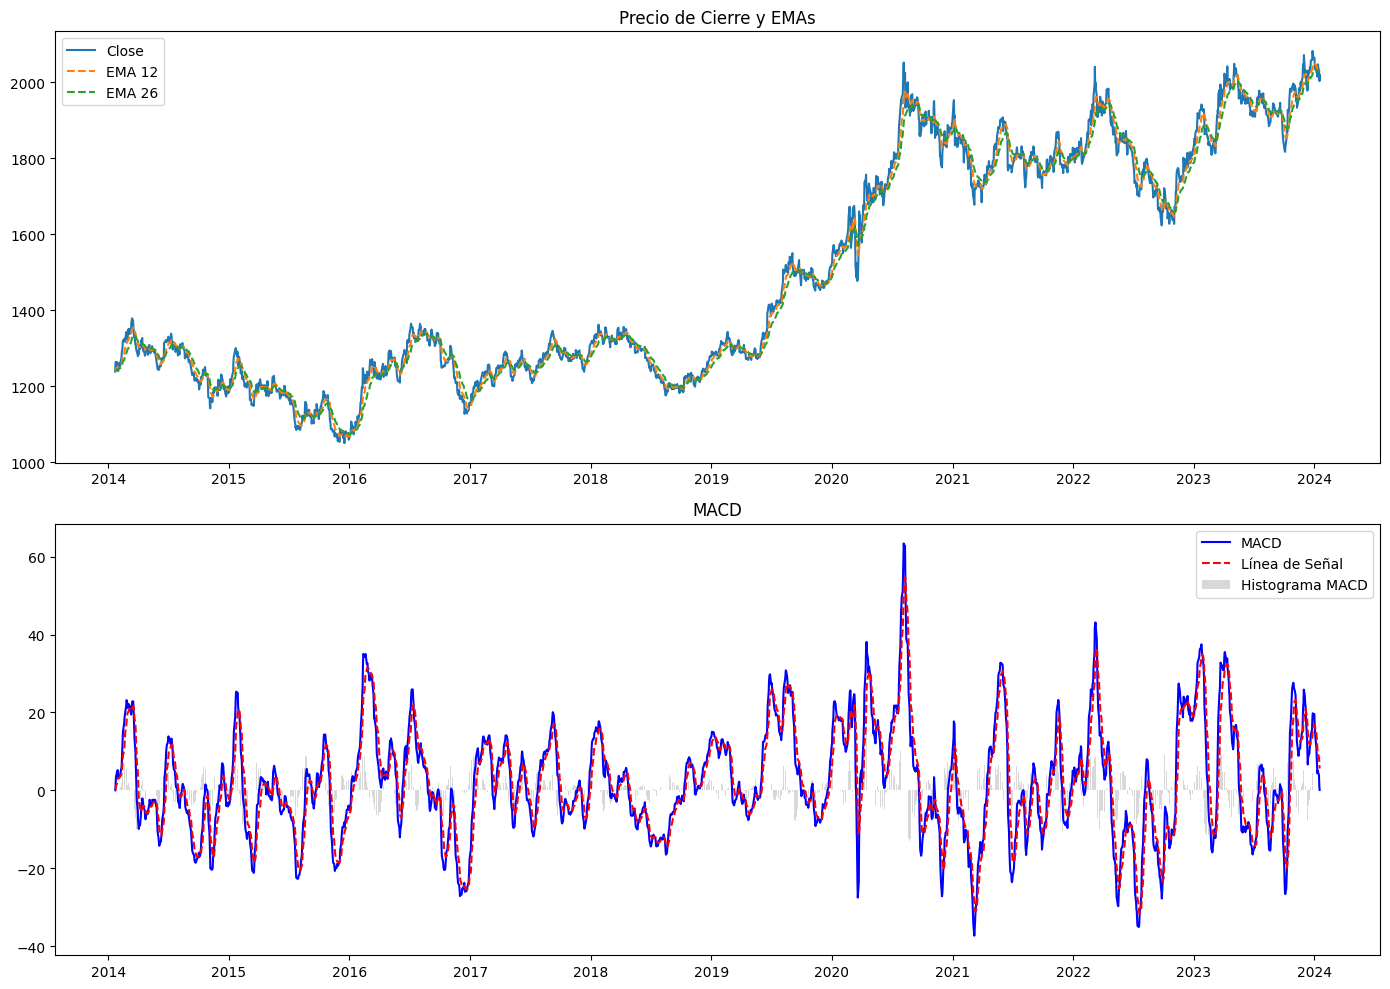

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar la estructura del DataFrame y los cálculos previos
print(df_gold.head())

# Graficar los precios de cierre y las EMAs
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(df_gold.index, df_gold['Close'], label='Close')
plt.plot(df_gold.index, df_gold['EMA_12'], label='EMA 12', linestyle='--')
plt.plot(df_gold.index, df_gold['EMA_26'], label='EMA 26', linestyle='--')
plt.title('Precio de Cierre y EMAs')
plt.legend()

# Graficar MACD, la línea de señal y el histograma
plt.subplot(2, 1, 2)
plt.plot(df_gold.index, df_gold['MACD'], label='MACD', color='blue')
plt.plot(df_gold.index, df_gold['Signal_Line'], label='Línea de Señal', color='red', linestyle='--')
plt.bar(df_gold.index, df_gold['MACD_Histogram'], label='Histograma MACD', color='gray', alpha=0.3)
plt.title('MACD')
plt.legend()

plt.tight_layout()
plt.show()

                   Open         High          Low        Close  Volume  Year  \
Date                                                                           
2020-08-03  1984.300049  1984.300049  1955.500000  1966.000000     683  2020   
2020-08-04  1971.000000  2016.199951  1968.800049  2001.199951    2010  2020   
2020-08-05  2024.000000  2050.199951  2011.000000  2031.099976    1422  2020   
2020-08-06  2045.500000  2063.000000  2040.000000  2051.500000     294  2020   
2020-08-07  2040.099976  2055.000000  2009.599976  2010.099976     808  2020   

            Month       EMA_12       EMA_26       MACD  Signal_Line  \
Date                                                                  
2020-08-03      8  1910.787692  1859.692250  51.095442    41.158092   
2020-08-04      8  1924.697270  1870.174302  54.522969    43.831067   
2020-08-05      8  1941.066917  1882.094722  58.972195    46.859293   
2020-08-06      8  1958.056622  1894.643261  63.413361    50.170107   
2020-08-07   

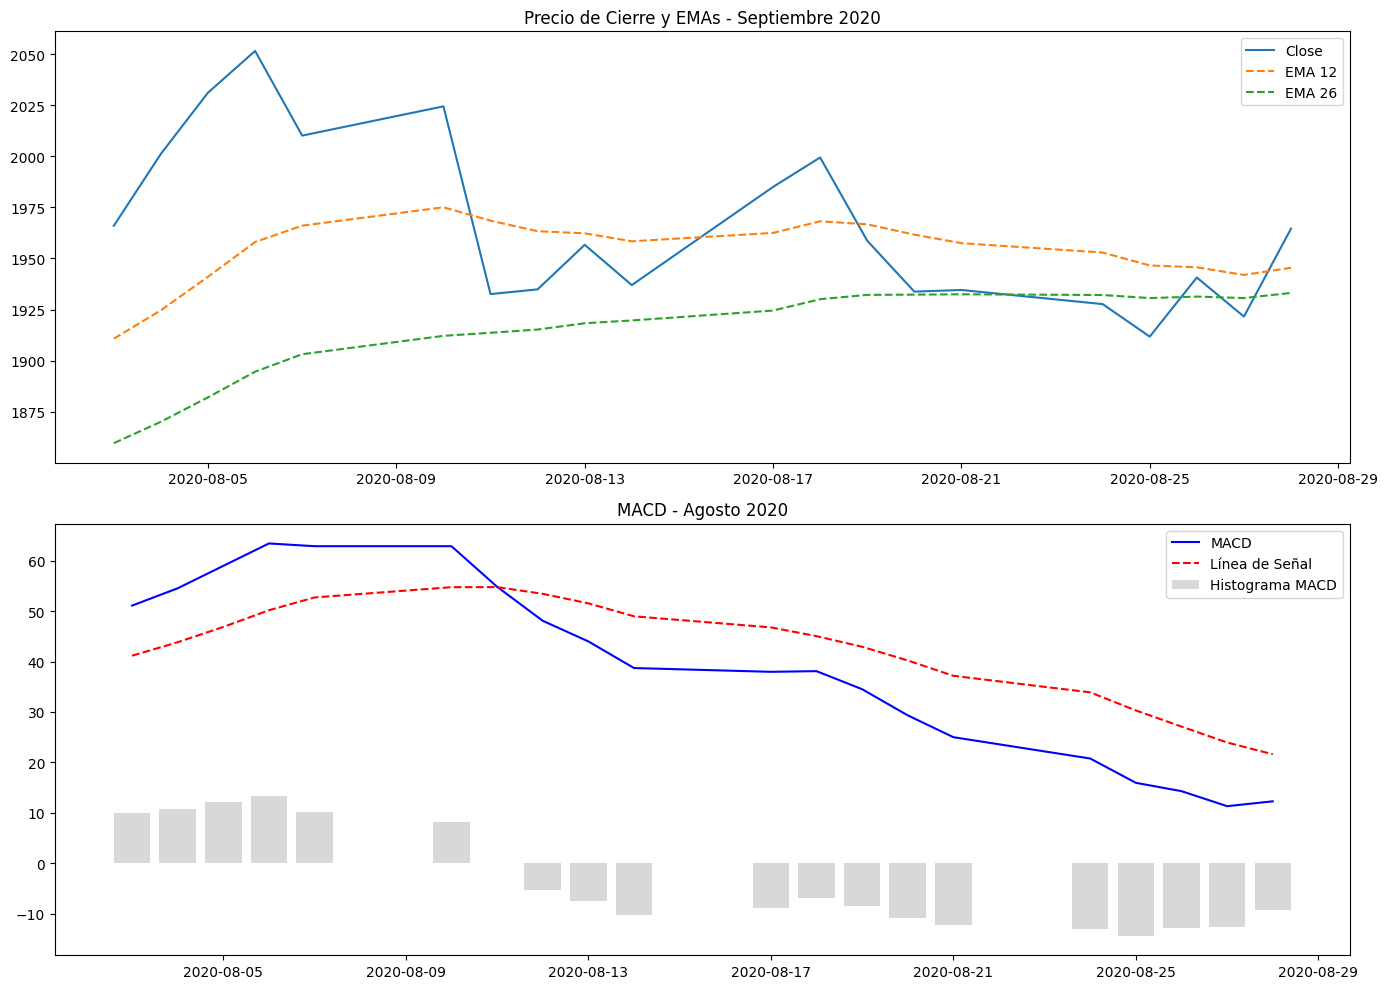

In [31]:
# Suponiendo que df_gold ya está definido y contiene los cálculos anteriores
# Filtrar los datos para el mes de septiembre de 2020
ago_2020_data = df_gold.loc['2020-08-01':'2020-08-30']

# Verificar la estructura del DataFrame y los cálculos previos
print(ago_2020_data.head())

# Graficar los precios de cierre y las EMAs para septiembre de 2020
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(ago_2020_data.index, ago_2020_data['Close'], label='Close')
plt.plot(ago_2020_data.index, ago_2020_data['EMA_12'], label='EMA 12', linestyle='--')
plt.plot(ago_2020_data.index, ago_2020_data['EMA_26'], label='EMA 26', linestyle='--')
plt.title('Precio de Cierre y EMAs - Septiembre 2020')
plt.legend()

# Graficar MACD, la línea de señal y el histograma para septiembre de 2020
plt.subplot(2, 1, 2)
plt.plot(ago_2020_data.index, ago_2020_data['MACD'], label='MACD', color='blue')
plt.plot(ago_2020_data.index, ago_2020_data['Signal_Line'], label='Línea de Señal', color='red', linestyle='--')
plt.bar(ago_2020_data.index, ago_2020_data['MACD_Histogram'], label='Histograma MACD', color='gray', alpha=0.3)
plt.title('MACD - Agosto 2020')
plt.legend()

plt.tight_layout()
plt.show()


###  LA FED Y LOS TIPOS DE INTERÉS

In [32]:
import requests

# Obtener los datos de los tipos de interés de la FED desde FRED
fred_url = 'https://api.stlouisfed.org/fred/series/observations'
params = {
    'series_id': 'DFF',
    'api_key': 'e0255abcc5690bde4904e9a11a8e0cb6',
    'file_type': 'json'
}
response = requests.get(fred_url, params=params)
response_dict = response.json()

# Verificar si hay observaciones
if 'observations' in response_dict:
    data = response_dict['observations']
    df_fed = pd.DataFrame(data)[['date', 'value']]
    df_fed['date'] = pd.to_datetime(df_fed['date'])

    # Convertir 'value' a tipo float
    df_fed['value'] = pd.to_numeric(df_fed['value'], errors='coerce')

    # Mostrar los primeros y últimos registros del DataFrame
    print(df_fed.head())
    print(df_fed.tail())
    print(df_fed.info())
    print(df_fed.describe())
else:
    print('Error: no se encontraron datos de la serie de tipos de interés de la FED')

        date  value
0 1954-07-01   1.13
1 1954-07-02   1.25
2 1954-07-03   1.25
3 1954-07-04   1.25
4 1954-07-05   0.88
            date  value
25532 2024-05-26   5.33
25533 2024-05-27   5.33
25534 2024-05-28   5.33
25535 2024-05-29   5.33
25536 2024-05-30   5.33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25537 entries, 0 to 25536
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    25537 non-null  datetime64[ns]
 1   value   25537 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 399.1 KB
None
              value
count  25537.000000
mean       4.606133
std        3.598881
min        0.040000
25%        1.790000
50%        4.250000
75%        6.250000
max       22.360000


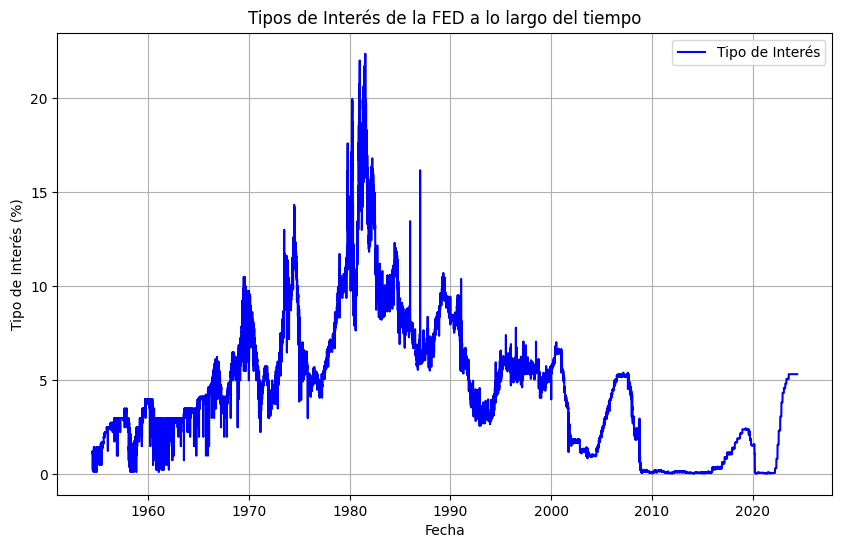

In [33]:

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_fed['date'], df_fed['value'], label='Tipo de Interés', color='blue')

# Añadir título y etiquetas
plt.title('Tipos de Interés de la FED a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Tipo de Interés (%)')

# Añadir una cuadrícula
plt.grid(True)

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [34]:
df_gold

,Open,High,Low,Close,Volume,Year,Month,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram
Date,,,,,,,,,,,,
2014-01-22,1241.699951,1242.000000,1239.000000,1239.000000,58,2014,1,1239.000000,1239.000000,0.000000,0.000000,0.000000
2014-01-23,1235.199951,1264.199951,1235.199951,1262.599976,40,2014,1,1242.630765,1240.748146,1.882619,0.376524,1.506095
2014-01-24,1258.300049,1269.400024,1258.300049,1264.500000,38,2014,1,1245.995263,1242.507543,3.487720,0.998763,2.488957
2014-01-27,1259.800049,1264.400024,1254.400024,1263.599976,92,2014,1,1248.703680,1244.069945,4.633735,1.725757,2.907978
2014-01-28,1257.900024,1258.400024,1251.000000,1251.000000,20,2014,1,1249.056960,1244.583283,4.473678,2.275342,2.198336
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-11,2025.099976,2025.099976,2014.300049,2014.300049,97,2024,1,2034.125596,2029.749481,4.376115,10.745325,-6.369210
2024-01-12,2031.099976,2057.000000,2031.099976,2046.699951,390,2024,1,2036.060112,2031.005071,5.055041,9.607269,-4.552228
2024-01-16,2051.699951,2054.800049,2026.000000,2026.000000,46,2024,1,2034.512403,2030.634325,3.878077,8.461430,-4.583353


In [35]:
stock_market_filtered

,Date,Bitcoin_Price,Silver_Price,Nasdaq_100_Price
0,2024-02-02,43194.7,22.796,17642.73
1,2024-02-01,43081.4,23.236,17344.71
2,2024-01-31,42580.5,23.169,17137.24
3,2024-01-30,42946.2,23.225,17476.71
4,2024-01-29,43299.8,23.134,17596.27
...,...,...,...,...
1238,2019-02-08,3661.7,15.809,6913.13
1239,2019-02-07,3397.7,15.713,6904.98
1240,2019-02-06,3404.3,15.701,6997.62
1241,2019-02-05,3468.4,15.836,7023.52


In [36]:
# Suponiendo que ya tienes cargados los DataFrames df_gold y stock_market_filtered

# Convertir el índice de df_gold a una columna de fechas
df_gold_reset = df_gold.reset_index()
df_gold_reset.rename(columns={'index': 'Date'}, inplace=True)

# Determinar el rango de fechas común
start_date = max(df_gold_reset['Date'].min(), stock_market_filtered['Date'].min())
end_date = min(df_gold_reset['Date'].max(), stock_market_filtered['Date'].max())

# Filtrar ambos DataFrames por el rango de fechas común
df_gold_filtered = df_gold_reset[(df_gold_reset['Date'] >= start_date) & (df_gold_reset['Date'] <= end_date)]
stock_market_filtered_filtered = stock_market_filtered[(stock_market_filtered['Date'] >= start_date) & (stock_market_filtered['Date'] <= end_date)]

# Fusionar los DataFrames en función de la columna 'Date'
merged_df = pd.merge(df_gold_filtered, stock_market_filtered_filtered, on='Date')

# Mostrar el DataFrame resultante
print(merged_df)


           Date         Open         High          Low        Close  Volume  \
0    2019-02-04  1318.099976  1318.099976  1308.300049  1314.300049     675   
1    2019-02-05  1311.099976  1315.099976  1311.000000  1314.199951     362   
2    2019-02-06  1312.500000  1313.500000  1305.000000  1309.500000     358   
3    2019-02-07  1302.900024  1310.400024  1302.199951  1309.400024     203   
4    2019-02-08  1309.500000  1314.000000  1307.800049  1313.699951     122   
...         ...          ...          ...          ...          ...     ...   
1227 2024-01-11  2025.099976  2025.099976  2014.300049  2014.300049      97   
1228 2024-01-12  2031.099976  2057.000000  2031.099976  2046.699951     390   
1229 2024-01-16  2051.699951  2054.800049  2026.000000  2026.000000      46   
1230 2024-01-17  2026.500000  2026.500000  2002.599976  2002.599976     764   
1231 2024-01-18  2012.800049  2018.599976  2009.500000  2018.599976    1474   

      Year  Month       EMA_12       EMA_26       M

In [37]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1232 non-null   datetime64[ns]
 1   Open              1232 non-null   float64       
 2   High              1232 non-null   float64       
 3   Low               1232 non-null   float64       
 4   Close             1232 non-null   float64       
 5   Volume            1232 non-null   int64         
 6   Year              1232 non-null   int64         
 7   Month             1232 non-null   int64         
 8   EMA_12            1232 non-null   float64       
 9   EMA_26            1232 non-null   float64       
 10  MACD              1232 non-null   float64       
 11  Signal_Line       1232 non-null   float64       
 12  MACD_Histogram    1232 non-null   float64       
 13  Bitcoin_Price     1232 non-null   float64       
 14  Silver_Price      1232 n

In [38]:
merged_df

,Date,Open,High,Low,Close,Volume,Year,Month,EMA_12,EMA_26,MACD,Signal_Line,MACD_Histogram,Bitcoin_Price,Silver_Price,Nasdaq_100_Price
0,2019-02-04,1318.099976,1318.099976,1308.300049,1314.300049,675,2019,2,1302.896879,1289.781208,13.115671,11.686637,1.429034,3462.8,15.886,6959.96
1,2019-02-05,1311.099976,1315.099976,1311.000000,1314.199951,362,2019,2,1304.635813,1291.590004,13.045809,11.958472,1.087338,3468.4,15.836,7023.52
2,2019-02-06,1312.500000,1313.500000,1305.000000,1309.500000,358,2019,2,1305.384150,1292.916670,12.467479,12.060273,0.407206,3404.3,15.701,6997.62
3,2019-02-07,1302.900024,1310.400024,1302.199951,1309.400024,203,2019,2,1306.001976,1294.137659,11.864317,12.021082,-0.156765,3397.7,15.713,6904.98
4,2019-02-08,1309.500000,1314.000000,1307.800049,1313.699951,122,2019,2,1307.186280,1295.586718,11.599562,11.936778,-0.337216,3661.7,15.809,6913.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2024-01-11,2025.099976,2025.099976,2014.300049,2014.300049,97,2024,1,2034.125596,2029.749481,4.376115,10.745325,-6.369210,46348.2,22.595,16820.90
1228,2024-01-12,2031.099976,2057.000000,2031.099976,2046.699951,390,2024,1,2036.060112,2031.005071,5.055041,9.607269,-4.552228,42835.9,23.218,16832.92
1229,2024-01-16,2051.699951,2054.800049,2026.000000,2026.000000,46,2024,1,2034.512403,2030.634325,3.878077,8.461430,-4.583353,43145.5,22.983,16830.71
1230,2024-01-17,2026.500000,2026.500000,2002.599976,2002.599976,764,2024,1,2029.602798,2028.557707,1.045092,6.978163,-5.933071,42768.7,22.559,16736.28


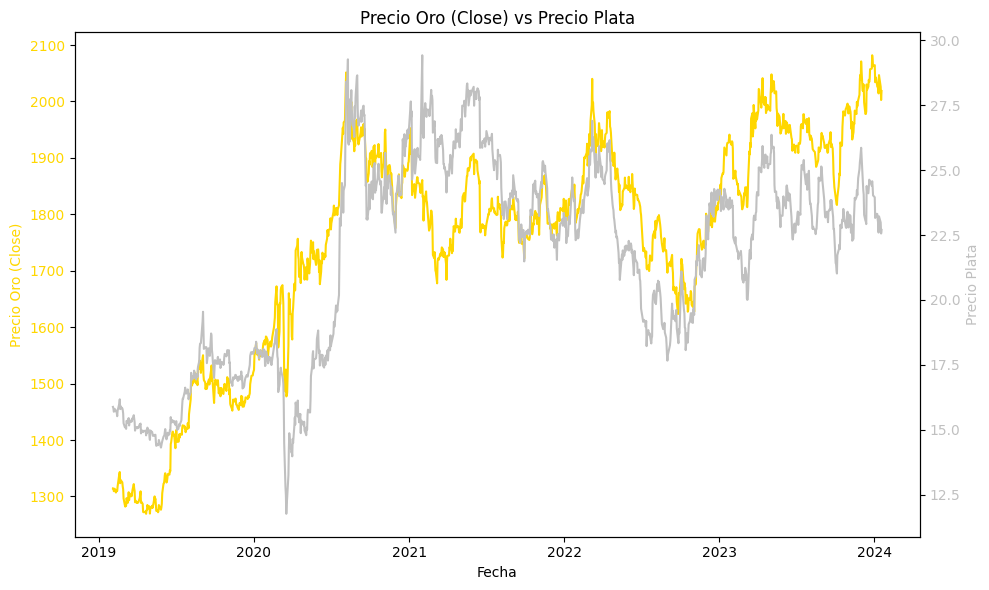

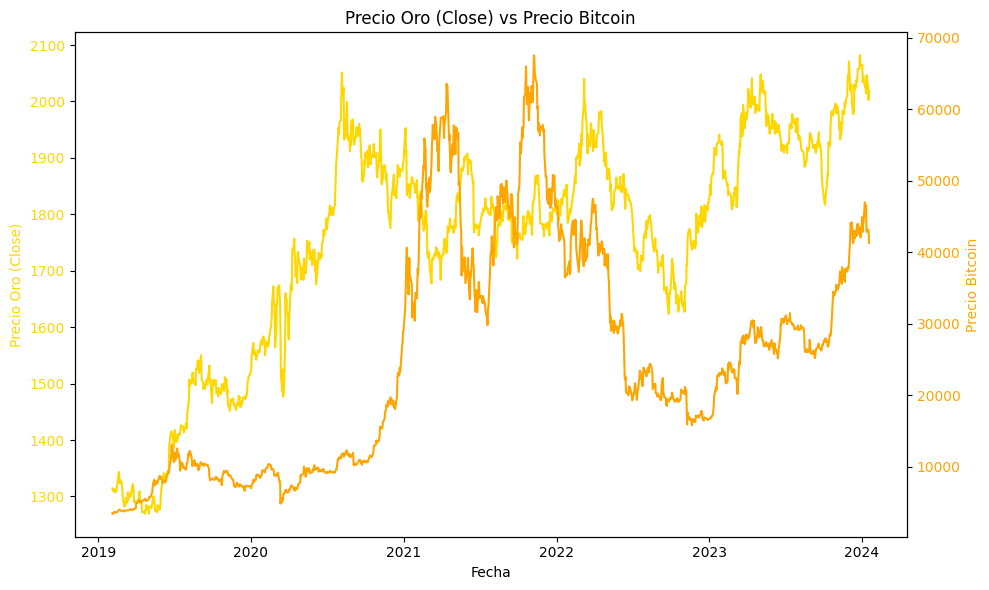

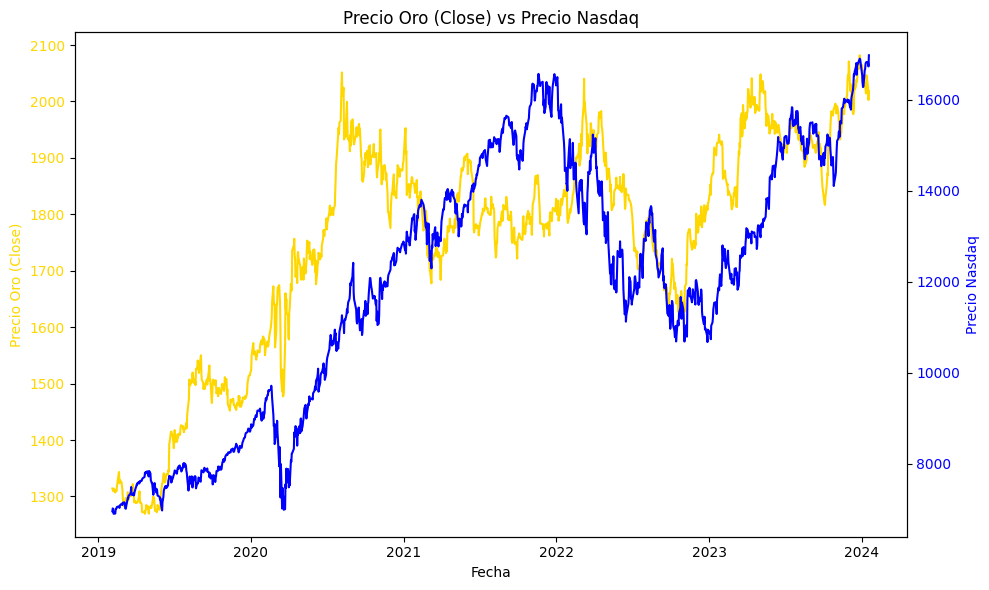

In [39]:
import matplotlib.pyplot as plt

# Asumiendo que merged_df es el DataFrame fusionado resultante

# Gráfico 1: Precio Oro (Close) vs Precio Plata
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'gold'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio Oro (Close)', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'silver'
ax2.set_ylabel('Precio Plata', color=color)
ax2.plot(merged_df['Date'], merged_df['Silver_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Precio Oro (Close) vs Precio Plata')
fig.tight_layout()
plt.show()

# Gráfico 2: Precio Oro (Close) vs Precio Bitcoin
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'gold'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio Oro (Close)', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel('Precio Bitcoin', color=color)
ax2.plot(merged_df['Date'], merged_df['Bitcoin_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Precio Oro (Close) vs Precio Bitcoin')
fig.tight_layout()
plt.show()

# Gráfico 3: Precio Oro (Close) vs Precio Nasdaq
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'gold'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio Oro (Close)', color=color)
ax1.plot(merged_df['Date'], merged_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Precio Nasdaq', color=color)
ax2.plot(merged_df['Date'], merged_df['Nasdaq_100_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Precio Oro (Close) vs Precio Nasdaq')
fig.tight_layout()
plt.show()

In [40]:
# Renombrar la columna 'date' de xauusd_daily a 'Date' para que coincida con merged_df
xauusd_daily.rename(columns={'date': 'Date'}, inplace=True)

# Determinar el rango de fechas común
start_date = max(merged_df['Date'].min(), xauusd_daily['Date'].min())
end_date = min(merged_df['Date'].max(), xauusd_daily['Date'].max())

# Filtrar ambos DataFrames por el rango de fechas común
merged_df_filtered = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]
xauusd_daily_filtered = xauusd_daily[(xauusd_daily['Date'] >= start_date) & (xauusd_daily['Date'] <= end_date)]

# Fusionar los DataFrames en función de la columna 'Date'
final_merged_df = pd.merge(merged_df_filtered, xauusd_daily_filtered, on='Date')

# Mostrar el DataFrame resultante
print(final_merged_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              706 non-null    datetime64[ns]
 1   Open              706 non-null    float64       
 2   High              706 non-null    float64       
 3   Low               706 non-null    float64       
 4   Close             706 non-null    float64       
 5   Volume            706 non-null    int64         
 6   Year              706 non-null    int64         
 7   Month             706 non-null    int64         
 8   EMA_12            706 non-null    float64       
 9   EMA_26            706 non-null    float64       
 10  MACD              706 non-null    float64       
 11  Signal_Line       706 non-null    float64       
 12  MACD_Histogram    706 non-null    float64       
 13  Bitcoin_Price     706 non-null    float64       
 14  Silver_Price      706 non-

In [41]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 705
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              706 non-null    datetime64[ns]
 1   Open              706 non-null    float64       
 2   High              706 non-null    float64       
 3   Low               706 non-null    float64       
 4   Close             706 non-null    float64       
 5   Volume            706 non-null    int64         
 6   Year              706 non-null    int64         
 7   Month             706 non-null    int64         
 8   EMA_12            706 non-null    float64       
 9   EMA_26            706 non-null    float64       
 10  MACD              706 non-null    float64       
 11  Signal_Line       706 non-null    float64       
 12  MACD_Histogram    706 non-null    float64       
 13  Bitcoin_Price     706 non-null    float64       
 14  Silver_Price      706 non-

Descartamos la fusión anterior, para obtener por nuestra cuenta el SMA14 y el RSI14

In [42]:
# Calcular SMA (14)
merged_df['SMA_14'] = merged_df['Close'].rolling(window=14).mean()

# Calcular RSI (14)
delta = merged_df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
merged_df['RSI_14'] = 100 - (100 / (1 + rs))

# Mostrar el DataFrame resultante con las nuevas columnas
print(merged_df)

# Opcional: Guardar el DataFrame resultante en un archivo CSV
# merged_df.to_csv('merged_df_with_rsi_sma.csv', index=False)


           Date         Open         High          Low        Close  Volume  \
0    2019-02-04  1318.099976  1318.099976  1308.300049  1314.300049     675   
1    2019-02-05  1311.099976  1315.099976  1311.000000  1314.199951     362   
2    2019-02-06  1312.500000  1313.500000  1305.000000  1309.500000     358   
3    2019-02-07  1302.900024  1310.400024  1302.199951  1309.400024     203   
4    2019-02-08  1309.500000  1314.000000  1307.800049  1313.699951     122   
...         ...          ...          ...          ...          ...     ...   
1227 2024-01-11  2025.099976  2025.099976  2014.300049  2014.300049      97   
1228 2024-01-12  2031.099976  2057.000000  2031.099976  2046.699951     390   
1229 2024-01-16  2051.699951  2054.800049  2026.000000  2026.000000      46   
1230 2024-01-17  2026.500000  2026.500000  2002.599976  2002.599976     764   
1231 2024-01-18  2012.800049  2018.599976  2009.500000  2018.599976    1474   

      Year  Month       EMA_12       EMA_26       M

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1232 non-null   datetime64[ns]
 1   Open              1232 non-null   float64       
 2   High              1232 non-null   float64       
 3   Low               1232 non-null   float64       
 4   Close             1232 non-null   float64       
 5   Volume            1232 non-null   int64         
 6   Year              1232 non-null   int64         
 7   Month             1232 non-null   int64         
 8   EMA_12            1232 non-null   float64       
 9   EMA_26            1232 non-null   float64       
 10  MACD              1232 non-null   float64       
 11  Signal_Line       1232 non-null   float64       
 12  MACD_Histogram    1232 non-null   float64       
 13  Bitcoin_Price     1232 non-null   float64       
 14  Silver_Price      1232 n

In [44]:
df_fed

,date,value
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
25532,2024-05-26,5.33
25533,2024-05-27,5.33
25534,2024-05-28,5.33
25535,2024-05-29,5.33


In [45]:
# Renombrar la columna 'date' de df_fed a 'Date' para que coincida con merged_df
df_fed.rename(columns={'date': 'Date'}, inplace=True)

# Determinar el rango de fechas común
start_date = max(merged_df['Date'].min(), df_fed['Date'].min())
end_date = min(merged_df['Date'].max(), df_fed['Date'].max())

# Filtrar ambos DataFrames por el rango de fechas común
merged_df_filtered = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)]
df_fed_filtered = df_fed[(df_fed['Date'] >= start_date) & (df_fed['Date'] <= end_date)]

# Fusionar los DataFrames en función de la columna 'Date'
final_merged_df = pd.merge(merged_df_filtered, df_fed_filtered, on='Date', how='left')

# Renombrar la columna 'value' a 'Interest_Rate' para mayor claridad
final_merged_df.rename(columns={'value': 'Interest_Rate'}, inplace=True)

# Mostrar el DataFrame resultante
print(final_merged_df)

# Opcional: Guardar el DataFrame resultante en un archivo CSV
# final_merged_df.to_csv('final_merged_df.csv', index=False)


           Date         Open         High          Low        Close  Volume  \
0    2019-02-04  1318.099976  1318.099976  1308.300049  1314.300049     675   
1    2019-02-05  1311.099976  1315.099976  1311.000000  1314.199951     362   
2    2019-02-06  1312.500000  1313.500000  1305.000000  1309.500000     358   
3    2019-02-07  1302.900024  1310.400024  1302.199951  1309.400024     203   
4    2019-02-08  1309.500000  1314.000000  1307.800049  1313.699951     122   
...         ...          ...          ...          ...          ...     ...   
1227 2024-01-11  2025.099976  2025.099976  2014.300049  2014.300049      97   
1228 2024-01-12  2031.099976  2057.000000  2031.099976  2046.699951     390   
1229 2024-01-16  2051.699951  2054.800049  2026.000000  2026.000000      46   
1230 2024-01-17  2026.500000  2026.500000  2002.599976  2002.599976     764   
1231 2024-01-18  2012.800049  2018.599976  2009.500000  2018.599976    1474   

      Year  Month       EMA_12       EMA_26       M

In [46]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1232 non-null   datetime64[ns]
 1   Open              1232 non-null   float64       
 2   High              1232 non-null   float64       
 3   Low               1232 non-null   float64       
 4   Close             1232 non-null   float64       
 5   Volume            1232 non-null   int64         
 6   Year              1232 non-null   int64         
 7   Month             1232 non-null   int64         
 8   EMA_12            1232 non-null   float64       
 9   EMA_26            1232 non-null   float64       
 10  MACD              1232 non-null   float64       
 11  Signal_Line       1232 non-null   float64       
 12  MACD_Histogram    1232 non-null   float64       
 13  Bitcoin_Price     1232 non-null   float64       
 14  Silver_Price      1232 n

In [47]:
final_merged_df = final_merged_df.dropna(subset=['SMA_14', 'RSI_14'])

# Verificar si hay algún NaN restante en el DataFrame
print(final_merged_df.isna().sum())


Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
Year                0
Month               0
EMA_12              0
EMA_26              0
MACD                0
Signal_Line         0
MACD_Histogram      0
Bitcoin_Price       0
Silver_Price        0
Nasdaq_100_Price    0
SMA_14              0
RSI_14              0
Interest_Rate       0
dtype: int64


In [48]:
# Guardar el DataFrame resultante en un archivo CSV
final_merged_df.to_csv('final_merged_df.csv', index=False)

In [49]:
# Seleccionando las columnas requeridas
columns_to_keep = [
    "Date",
    "Close",
    "Volume",
    "MACD",
    "SMA_14",
    "RSI_14",
    "Interest_Rate",
    "Bitcoin_Price",
    "Silver_Price",
    "Nasdaq_100_Price",
]

filtered_df = final_merged_df[columns_to_keep]

# Mostrar el DataFrame filtrado
print(filtered_df.describe())
print(filtered_df.info())
print(filtered_df.head())
print(filtered_df.tail())


             Close         Volume         MACD       SMA_14       RSI_14  \
count  1219.000000    1219.000000  1219.000000  1219.000000  1219.000000   
mean   1755.485150    4516.101723     4.187447  1751.726671    52.643950   
std     197.002918   25783.802852    16.525560   196.854703    16.683779   
min    1269.300049       0.000000   -37.344751  1276.364284     4.800594   
25%    1666.299988      67.500000    -7.776848  1666.092856    40.968627   
50%    1799.599976     223.000000     2.148719  1799.342843    52.179330   
75%    1903.799988     622.500000    16.776714  1899.814279    64.433261   
max    2081.899902  346362.000000    63.413361  2048.699977    95.783149   

       Interest_Rate  Bitcoin_Price  Silver_Price  Nasdaq_100_Price  
count    1219.000000    1219.000000   1219.000000       1219.000000  
mean        1.895660   25324.336259     21.639680      12042.430008  
std         1.950785   15954.819474      3.848541       2822.405030  
min         0.040000    3715.900000

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las columnas a normalizar (excluyendo la columna 'Date')
columns_to_normalize = [
    "Close",
    "Volume",
    "MACD",
    "SMA_14",
    "RSI_14",
    "Interest_Rate",
    "Bitcoin_Price",
    "Silver_Price",
    "Nasdaq_100_Price",
]

# Inicializar el scaler
scaler = MinMaxScaler()

# Normalizar las columnas seleccionadas
filtered_df.loc[:, columns_to_normalize] = scaler.fit_transform(filtered_df[columns_to_normalize])

# Mostrar el DataFrame normalizado
print(filtered_df.describe())
print(filtered_df.head())
print(filtered_df.tail())


             Close       Volume         MACD       SMA_14       RSI_14  \
count  1219.000000  1219.000000  1219.000000  1219.000000  1219.000000   
mean      0.598308     0.013039     0.412197     0.615487     0.525852   
std       0.242435     0.074442     0.164012     0.254882     0.183373   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.488555     0.000195     0.293454     0.504610     0.397527   
50%       0.652597     0.000644     0.391963     0.677139     0.520745   
75%       0.780827     0.001797     0.537143     0.807227     0.655430   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Interest_Rate  Bitcoin_Price  Silver_Price  Nasdaq_100_Price  
count    1219.000000    1219.000000   1219.000000       1219.000000  
mean        0.350786       0.338627      0.559202          0.506225  
std         0.368768       0.250029      0.218097          0.282120  
min         0.000000       0.000000      0.000000    

/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2212318071.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, columns_to_normalize] = scaler.fit_transform(filtered_df[columns_to_normalize])


In [51]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(filtered_df) * 0.8)
train_df = filtered_df[:train_size]
test_df = filtered_df[train_size:]

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", train_df.shape)
print("Tamaño del conjunto de prueba:", test_df.shape)

# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba
print("Conjunto de entrenamiento:")
print(train_df.head())
print(train_df.tail())

print("Conjunto de prueba:")
print(test_df.head())
print(test_df.tail())

Tamaño del conjunto de entrenamiento: (975, 10)
Tamaño del conjunto de prueba: (244, 10)
Conjunto de entrenamiento:
         Date     Close    Volume      MACD    SMA_14    RSI_14  \
13 2019-02-22  0.073714  0.002073  0.487094  0.053918  0.599531   
14 2019-02-25  0.069653  0.000534  0.482291  0.054991  0.573597   
15 2019-02-26  0.068668  0.002711  0.476623  0.055999  0.568359   
16 2019-02-27  0.059562  0.001744  0.465115  0.056757  0.548949   
17 2019-02-28  0.053532  0.000407  0.451143  0.057072  0.517280   

    Interest_Rate  Bitcoin_Price  Silver_Price  Nasdaq_100_Price  
13       0.446125       0.003907      0.234727          0.011255  
14       0.446125       0.001846      0.229967          0.013735  
15       0.446125       0.001479      0.230080          0.014514  
16       0.446125       0.001547      0.226340          0.013893  
17       0.446125       0.001578      0.218860          0.011945  
          Date     Close    Volume      MACD    SMA_14    RSI_14  \
983 2023-01

In [52]:
import numpy as np

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 60

# Crear secuencias de entrenamiento
train_data = train_df.drop(columns=["Date"]).values
X_train, y_train = create_sequences(train_data, sequence_length)

# Crear secuencias de prueba
test_data = test_df.drop(columns=["Date"]).values
X_test, y_test = create_sequences(test_data, sequence_length)

# Mostrar las dimensiones de las secuencias de entrenamiento y prueba
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (915, 60, 9)
Dimensiones de y_train: (915, 9)
Dimensiones de X_test: (184, 60, 9)
Dimensiones de y_test: (184, 9)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(9))  # 9 porque tenemos 9 características de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de entrenamiento: {train_loss}')
print(f'Pérdida en el conjunto de prueba: {test_loss}')

2024-06-02 09:27:07.108140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


No supported GPU was found.
Epoch 1/20
23/23 [==============================] - 7s 84ms/step - loss: 0.0610 - val_loss: 0.0346
Epoch 2/20
23/23 [==============================] - 1s 52ms/step - loss: 0.0230 - val_loss: 0.0315
Epoch 3/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0162 - val_loss: 0.0307
Epoch 4/20
23/23 [==============================] - 1s 41ms/step - loss: 0.0135 - val_loss: 0.0271
Epoch 5/20
23/23 [==============================] - 1s 37ms/step - loss: 0.0121 - val_loss: 0.0258
Epoch 6/20
23/23 [==============================] - 1s 43ms/step - loss: 0.0111 - val_loss: 0.0255
Epoch 7/20
23/23 [==============================] - 1s 39ms/step - loss: 0.0100 - val_loss: 0.0241
Epoch 8/20
23/23 [==============================] - 1s 40ms/step - loss: 0.0096 - val_loss: 0.0246
Epoch 9/20
23/23 [==============================] - 1s 39ms/step - loss: 0.0090 - val_loss: 0.0252
Epoch 10/20
23/23 [==============================] - 1s 44ms/step - loss: 0.0083 

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Construir un modelo LSTM más complejo
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(9))  # 9 porque tenemos 9 características de salida

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de entrenamiento: {train_loss}')
print(f'Pérdida en el conjunto de prueba: {test_loss}')

Epoch 1/50
23/23 [==============================] - 10s 158ms/step - loss: 0.0622 - val_loss: 0.0357
Epoch 2/50
23/23 [==============================] - 2s 92ms/step - loss: 0.0212 - val_loss: 0.0316
Epoch 3/50
23/23 [==============================] - 2s 89ms/step - loss: 0.0158 - val_loss: 0.0263
Epoch 4/50
23/23 [==============================] - 2s 97ms/step - loss: 0.0136 - val_loss: 0.0280
Epoch 5/50
23/23 [==============================] - 2s 87ms/step - loss: 0.0120 - val_loss: 0.0279
Epoch 6/50
23/23 [==============================] - 2s 85ms/step - loss: 0.0112 - val_loss: 0.0250
Epoch 7/50
23/23 [==============================] - 2s 85ms/step - loss: 0.0107 - val_loss: 0.0258
Epoch 8/50
23/23 [==============================] - 2s 87ms/step - loss: 0.0100 - val_loss: 0.0253
Epoch 9/50
23/23 [==============================] - 3s 117ms/step - loss: 0.0089 - val_loss: 0.0232
Epoch 10/50
23/23 [==============================] - 2s 89ms/step - loss: 0.0089 - val_loss: 0.0252
Epoch 

6/6 [==============================] - 2s 28ms/step


/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2314456716.py:16: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_df["Date"][sequence_length:], real_close, color='blue', label='Real Gold Close Price')
/var/folders/vj/yb1nln5s36j0y5dqnpz3v_h00000gn/T/ipykernel_28485/2314456716.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(test_df["Date"][sequence_length:], predicted_close, color='red', label='Predicted Gold Close Price')


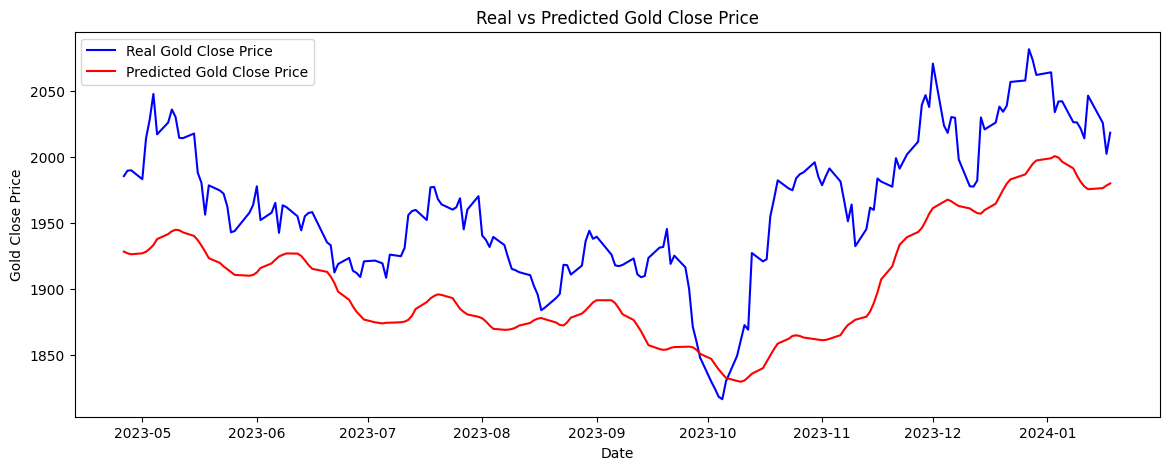

In [55]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
predicted_test = model.predict(X_test)

# Recuperar la columna de 'Close' de las predicciones y las etiquetas reales
predicted_close = predicted_test[:, 0]  # Suponiendo que 'Close' es la primera característica en y_test
real_close = y_test[:, 0]

# Invertir la normalización para obtener los valores reales
predicted_close = scaler.inverse_transform(predicted_test)[:, 0]
real_close = scaler.inverse_transform(y_test)[:, 0]

# Visualizar los resultados
plt.figure(figsize=(14, 5))
plt.plot(test_df["Date"][sequence_length:], real_close, color='blue', label='Real Gold Close Price')
plt.plot(test_df["Date"][sequence_length:], predicted_close, color='red', label='Predicted Gold Close Price')
plt.title('Real vs Predicted Gold Close Price')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.legend()
plt.show()

6/6 [==============================] - 0s 31ms/step


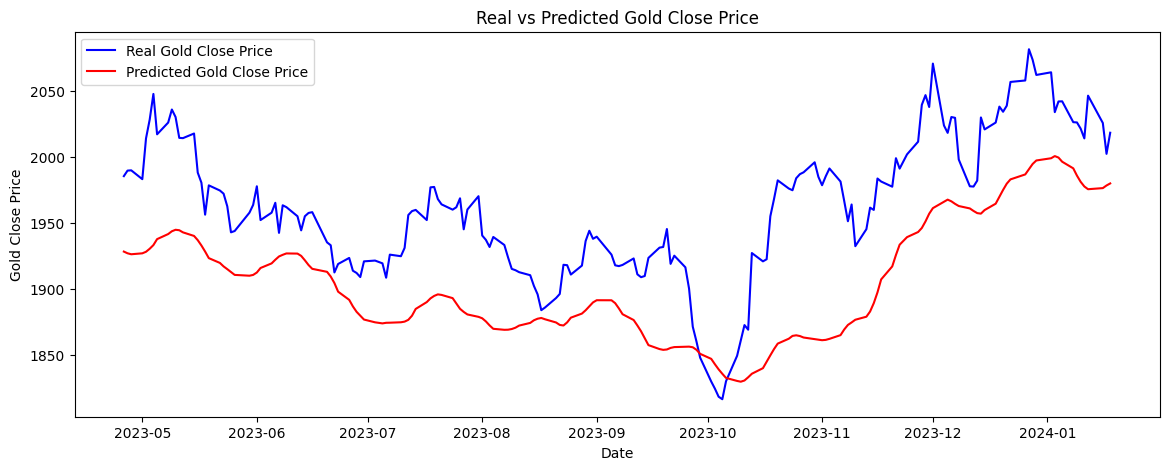

MAE: 57.923778341249516
RMSE: 64.73101277239746


In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Rehacer la predicción y asegurarse de que la normalización y desnormalización son correctas
predicted_test = model.predict(X_test)

# Asegurarse de que se reescala solo la columna de 'Close'
predicted_close = scaler.inverse_transform(np.concatenate((predicted_test[:, :1], np.zeros((predicted_test.shape[0], y_test.shape[1] - 1))), axis=1))[:, 0]
real_close = scaler.inverse_transform(np.concatenate((y_test[:, :1], np.zeros((y_test.shape[0], y_test.shape[1] - 1))), axis=1))[:, 0]

# Visualizar los resultados corregidos
plt.figure(figsize=(14, 5))
plt.plot(test_df["Date"].iloc[sequence_length:], real_close, color='blue', label='Real Gold Close Price')
plt.plot(test_df["Date"].iloc[sequence_length:], predicted_close, color='red', label='Predicted Gold Close Price')
plt.title('Real vs Predicted Gold Close Price')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.legend()
plt.show()

# Calcular y mostrar las métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(real_close, predicted_close)
rmse = np.sqrt(mean_squared_error(real_close, predicted_close))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(real_close, predicted_close)
rmse = np.sqrt(mean_squared_error(real_close, predicted_close))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 57.923778341249516
RMSE: 64.73101277239746


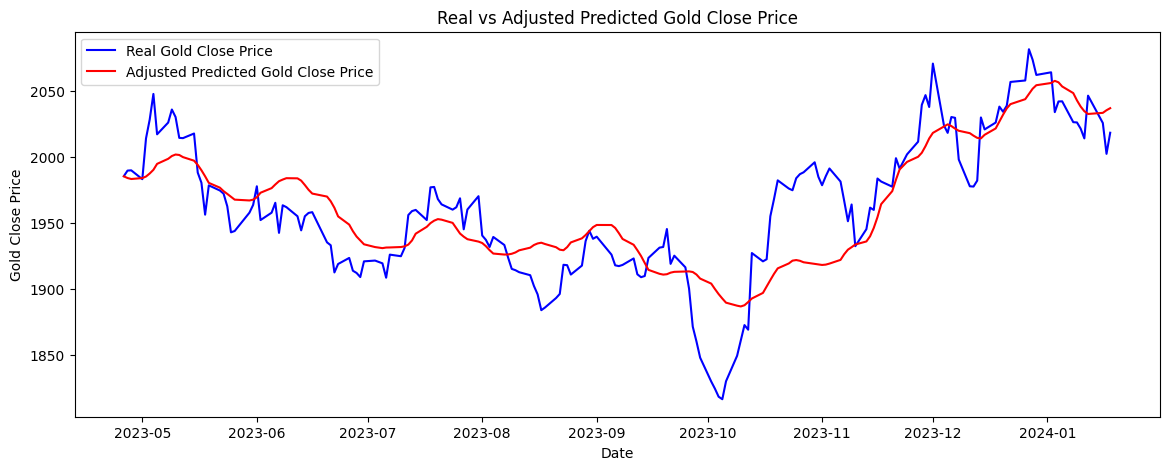

Adjusted MAE: 24.094193963614632
Adjusted RMSE: 30.600518219625002


In [58]:
# Calcular el desfase medio
mean_bias = np.mean(real_close - predicted_close)

# Ajustar las predicciones con el desfase medio
adjusted_predicted_close = predicted_close + mean_bias

# Visualizar los resultados ajustados
plt.figure(figsize=(14, 5))
plt.plot(test_df["Date"].iloc[sequence_length:], real_close, color='blue', label='Real Gold Close Price')
plt.plot(test_df["Date"].iloc[sequence_length:], adjusted_predicted_close, color='red', label='Adjusted Predicted Gold Close Price')
plt.title('Real vs Adjusted Predicted Gold Close Price')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.legend()
plt.show()

# Calcular y mostrar las métricas ajustadas
adjusted_mae = mean_absolute_error(real_close, adjusted_predicted_close)
adjusted_rmse = np.sqrt(mean_squared_error(real_close, adjusted_predicted_close))

print(f'Adjusted MAE: {adjusted_mae}')
print(f'Adjusted RMSE: {adjusted_rmse}')

In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Calcular el MSE
adjusted_mse = mean_squared_error(real_close, adjusted_predicted_close)

# Calcular el R² Score
adjusted_r2 = r2_score(real_close, adjusted_predicted_close)

# Calcular el MAPE
adjusted_mape = mean_absolute_percentage_error(real_close, adjusted_predicted_close)

# Mostrar las métricas
print(f'Adjusted MSE: {adjusted_mse}')
print(f'Adjusted R² Score: {adjusted_r2}')
print(f'Adjusted MAPE: {adjusted_mape}')
print(f'Adjusted MAE: {adjusted_mae}')
print(f'Adjusted RMSE: {adjusted_rmse}')

Adjusted MSE: 936.3917153096016
Adjusted R² Score: 0.6784833852462042
Adjusted MAPE: 0.012359084472691975
Adjusted MAE: 24.094193963614632
Adjusted RMSE: 30.600518219625002


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ajustar hiperparámetros
num_units = 128
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 50
batch_size = 32

# Construir el modelo LSTM con hiperparámetros ajustados
model = Sequential()
model.add(LSTM(num_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(dropout_rate))
model.add(LSTM(num_units, return_sequences=True))
model.add(Dropout(dropout_rate))
model.add(LSTM(num_units, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(50))
model.add(Dense(9))  # 9 porque tenemos 9 características de salida

# Compilar el modelo
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de entrenamiento: {train_loss}')
print(f'Pérdida en el conjunto de prueba: {test_loss}')

Epoch 1/50
23/23 [==============================] - 12s 236ms/step - loss: 0.0479 - val_loss: 0.0340
Epoch 2/50
23/23 [==============================] - 3s 138ms/step - loss: 0.0157 - val_loss: 0.0277
Epoch 3/50
23/23 [==============================] - 3s 139ms/step - loss: 0.0119 - val_loss: 0.0293
Epoch 4/50
23/23 [==============================] - 4s 167ms/step - loss: 0.0114 - val_loss: 0.0260
Epoch 5/50
23/23 [==============================] - 3s 140ms/step - loss: 0.0103 - val_loss: 0.0256
Epoch 6/50
23/23 [==============================] - 3s 145ms/step - loss: 0.0095 - val_loss: 0.0243
Epoch 7/50
23/23 [==============================] - 3s 143ms/step - loss: 0.0086 - val_loss: 0.0265
Epoch 8/50
23/23 [==============================] - 3s 140ms/step - loss: 0.0079 - val_loss: 0.0226
Epoch 9/50
23/23 [==============================] - 3s 146ms/step - loss: 0.0079 - val_loss: 0.0278
Epoch 10/50
23/23 [==============================] - 3s 135ms/step - loss: 0.0076 - val_loss: 0.023

6/6 [==============================] - 2s 43ms/step
Adjusted MSE: 806.153975704423
Adjusted R² Score: 0.7232014198746914
Adjusted MAPE: 0.01156401783488764
Adjusted MAE: 22.550893594544412
Adjusted RMSE: 28.392850785090655


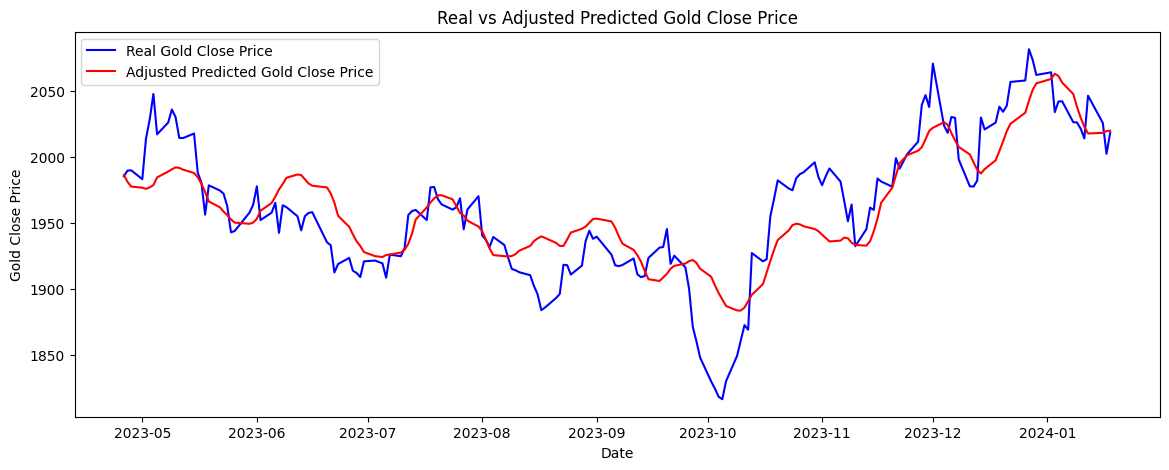

In [61]:
# Hacer predicciones en el conjunto de prueba
predicted_test = model.predict(X_test)

# Recuperar la columna de 'Close' de las predicciones y las etiquetas reales
predicted_close = predicted_test[:, 0]  # Suponiendo que 'Close' es la primera característica en y_test
real_close = y_test[:, 0]

# Invertir la normalización para obtener los valores reales
predicted_close = scaler.inverse_transform(np.concatenate((predicted_test[:, :1], np.zeros((predicted_test.shape[0], y_test.shape[1] - 1))), axis=1))[:, 0]
real_close = scaler.inverse_transform(np.concatenate((y_test[:, :1], np.zeros((y_test.shape[0], y_test.shape[1] - 1))), axis=1))[:, 0]

# Calcular el desfase medio
mean_bias = np.mean(real_close - predicted_close)

# Ajustar las predicciones con el desfase medio
adjusted_predicted_close = predicted_close + mean_bias

# Calcular y mostrar las métricas ajustadas
adjusted_mae = mean_absolute_error(real_close, adjusted_predicted_close)
adjusted_rmse = np.sqrt(mean_squared_error(real_close, adjusted_predicted_close))
adjusted_mse = mean_squared_error(real_close, adjusted_predicted_close)
adjusted_r2 = r2_score(real_close, adjusted_predicted_close)
adjusted_mape = mean_absolute_percentage_error(real_close, adjusted_predicted_close)

print(f'Adjusted MSE: {adjusted_mse}')
print(f'Adjusted R² Score: {adjusted_r2}')
print(f'Adjusted MAPE: {adjusted_mape}')
print(f'Adjusted MAE: {adjusted_mae}')
print(f'Adjusted RMSE: {adjusted_rmse}')

# Visualizar los resultados ajustados
plt.figure(figsize=(14, 5))
plt.plot(test_df["Date"].iloc[sequence_length:], real_close, color='blue', label='Real Gold Close Price')
plt.plot(test_df["Date"].iloc[sequence_length:], adjusted_predicted_close, color='red', label='Adjusted Predicted Gold Close Price')
plt.title('Real vs Adjusted Predicted Gold Close Price')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.legend()
plt.show()

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ajustar hiperparámetros
num_units = 128
dropout_rate = 0.3
learning_rate = 0.001
num_epochs = 100  # Incrementar el número de épocas
batch_size = 32

# Construir el modelo LSTM con hiperparámetros ajustados
model = Sequential()
model.add(LSTM(num_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(dropout_rate))
model.add(LSTM(num_units, return_sequences=True))
model.add(Dropout(dropout_rate))
model.add(LSTM(num_units, return_sequences=False))
model.add(Dropout(dropout_rate))
model.add(Dense(50))
model.add(Dense(9))  # 9 porque tenemos 9 características de salida

# Compilar el modelo
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Entrenar el modelo con más épocas
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluar el modelo
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

print(f'Pérdida en el conjunto de entrenamiento: {train_loss}')
print(f'Pérdida en el conjunto de prueba: {test_loss}')

Epoch 1/100
23/23 [==============================] - 11s 201ms/step - loss: 0.0475 - val_loss: 0.0330
Epoch 2/100
23/23 [==============================] - 3s 140ms/step - loss: 0.0159 - val_loss: 0.0311
Epoch 3/100
23/23 [==============================] - 3s 145ms/step - loss: 0.0121 - val_loss: 0.0293
Epoch 4/100
23/23 [==============================] - 3s 143ms/step - loss: 0.0114 - val_loss: 0.0283
Epoch 5/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0100 - val_loss: 0.0277
Epoch 6/100
23/23 [==============================] - 3s 152ms/step - loss: 0.0093 - val_loss: 0.0256
Epoch 7/100
23/23 [==============================] - 4s 161ms/step - loss: 0.0088 - val_loss: 0.0268
Epoch 8/100
23/23 [==============================] - 4s 162ms/step - loss: 0.0084 - val_loss: 0.0261
Epoch 9/100
23/23 [==============================] - 3s 153ms/step - loss: 0.0079 - val_loss: 0.0243
Epoch 10/100
23/23 [==============================] - 3s 142ms/step - loss: 0.0076 - val_l

6/6 [==============================] - 2s 43ms/step
Adjusted MSE: 715.4323368459178
Adjusted R² Score: 0.7543513261946753
Adjusted MAPE: 0.010827909143133118
Adjusted MAE: 21.242601038576
Adjusted RMSE: 26.7475669331982


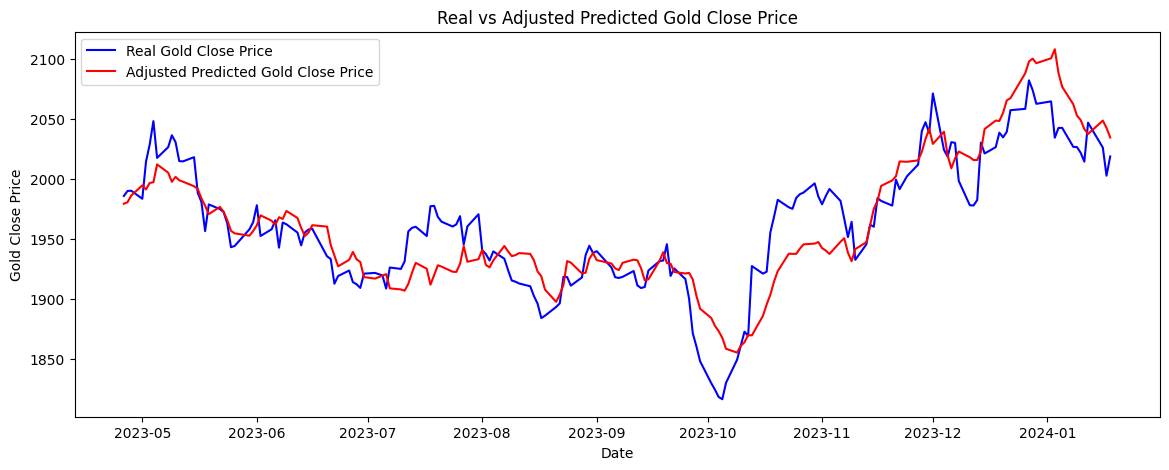

In [63]:
# Hacer predicciones en el conjunto de prueba
predicted_test = model.predict(X_test)

# Recuperar la columna de 'Close' de las predicciones y las etiquetas reales
predicted_close = predicted_test[:, 0]  # Suponiendo que 'Close' es la primera característica en y_test
real_close = y_test[:, 0]

# Invertir la normalización para obtener los valores reales
predicted_close = scaler.inverse_transform(np.concatenate((predicted_test[:, :1], np.zeros((predicted_test.shape[0], y_test.shape[1] - 1))), axis=1))[:, 0]
real_close = scaler.inverse_transform(np.concatenate((y_test[:, :1], np.zeros((y_test.shape[0], y_test.shape[1] - 1))), axis=1))[:, 0]

# Calcular el desfase medio
mean_bias = np.mean(real_close - predicted_close)

# Ajustar las predicciones con el desfase medio
adjusted_predicted_close = predicted_close + mean_bias

# Calcular y mostrar las métricas ajustadas
adjusted_mae = mean_absolute_error(real_close, adjusted_predicted_close)
adjusted_rmse = np.sqrt(mean_squared_error(real_close, adjusted_predicted_close))
adjusted_mse = mean_squared_error(real_close, adjusted_predicted_close)
adjusted_r2 = r2_score(real_close, adjusted_predicted_close)
adjusted_mape = mean_absolute_percentage_error(real_close, adjusted_predicted_close)

print(f'Adjusted MSE: {adjusted_mse}')
print(f'Adjusted R² Score: {adjusted_r2}')
print(f'Adjusted MAPE: {adjusted_mape}')
print(f'Adjusted MAE: {adjusted_mae}')
print(f'Adjusted RMSE: {adjusted_rmse}')

# Visualizar los resultados ajustados
plt.figure(figsize=(14, 5))
plt.plot(test_df["Date"].iloc[sequence_length:], real_close, color='blue', label='Real Gold Close Price')
plt.plot(test_df["Date"].iloc[sequence_length:], adjusted_predicted_close, color='red', label='Adjusted Predicted Gold Close Price')
plt.title('Real vs Adjusted Predicted Gold Close Price')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.legend()
plt.show()
